# jane-street-market-prediction-eda

## 
“Buy low, sell high.” It sounds so easy….

In reality, trading for profit has always been a difficult problem to solve, even more so in today’s fast-moving and complex financial markets. Electronic trading allows for thousands of transactions to occur within a fraction of a second, resulting in nearly unlimited opportunities to potentially find and take advantage of price differences in real time.

In a perfectly efficient market, buyers and sellers would have all the agency and information needed to make rational trading decisions. As a result, products would always remain at their “fair values” and never be undervalued or overpriced. However, financial markets are not perfectly efficient in the real world.

Developing trading strategies to identify and take advantage of inefficiencies is challenging. Even if a strategy is profitable now, it may not be in the future, and market volatility makes it impossible to predict the profitability of any given trade with certainty. As a result, it can be hard to distinguish good luck from having made a good trading decision.

In the first three months of this challenge, you will build your own quantitative trading model to maximize returns using market data from a major global stock exchange. Next, you’ll test the predictiveness of your models against future market returns and receive feedback on the leaderboard.

Your challenge will be to use the historical data, mathematical tools, and technological tools at your disposal to create a model that gets as close to certainty as possible. You will be presented with a number of potential trading opportunities, which your model must choose whether to accept or reject.

In general, if one is able to generate a highly predictive model which selects the right trades to execute, they would also be playing an important role in sending the market signals that push prices closer to “fair” values. That is, a better model will mean the market will be more efficient going forward. However, developing good models will be challenging for many reasons, including a very low signal-to-noise ratio, potential redundancy, strong feature correlation, and difficulty of coming up with a proper mathematical formulation.

Jane Street has spent decades developing their own trading models and machine learning solutions to identify profitable opportunities and quickly decide whether to execute trades. These models help Jane Street trade thousands of financial products each day across 200 trading venues around the world.

Admittedly, this challenge far oversimplifies the depth of the quantitative problems Jane Streeters work on daily, and Jane Street is happy with the performance of its existing trading model for this particular question. However, there’s nothing like a good puzzle, and this challenge will hopefully serve as a fun introduction to a type of data science problem that a Jane Streeter might tackle on a daily basis. Jane Street looks forward to seeing the new and creative approaches the Kaggle community will take to solve this trading challenge. 

Table of contents:
- [1. ENVIRONMENT CREATION AND DATA IMPORT](#section-1)


- [2. DATA EXPLORATION, CLEANING AND FEATURE SELECTION](#section-2)
    - [Evaluation features](#section-2.1)
    - [Anonymized features](#section-2.2)
    - [Date features](#section-2.3)
    - [Features transformation](#section-2.4)

<a id="section-1"></a>
# 1. ENVIRONMENT CREATION AND DATA IMPORT #

I am using datatable trick to speed up the train data cvs to pandas conversion. Source: https://www.kaggle.com/rohanrao/tutorial-on-reading-large-datasets

In [1]:
import contextlib
import time

@contextlib.contextmanager
def timer():
    start = time.time()
    
    yield

    end = time.time()
    runtime = 'Runtime: {:.2f}s \n'.format(end - start)
    print(runtime)

In [2]:
pip install datatable #==0.11.0 > /dev/null

     |████████████████████████████████| 83.9 MB 25.3 MB/s 
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datatable as dt

%matplotlib inline

#train = pd.read_csv("/kaggle/input/jane-street-market-prediction/train.csv")
train_datatable = dt.fread('../input/jane-street-market-prediction/train.csv')
train = train_datatable.to_pandas()

features = pd.read_csv("/kaggle/input/jane-street-market-prediction/features.csv")
example_test = pd.read_csv("/kaggle/input/jane-street-market-prediction/example_test.csv")
example_sample_submission = pd.read_csv("/kaggle/input/jane-street-market-prediction/example_sample_submission.csv")

## Imported datasets overview ##

In [4]:
train.shape

(2390491, 138)

In [5]:
train.head(10)

date     weight    resp_1    resp_2    resp_3    resp_4      resp  \
0     0   0.000000  0.009916  0.014079  0.008773  0.001390  0.006270   
1     0  16.673515 -0.002828 -0.003226 -0.007319 -0.011114 -0.009792   
2     0   0.000000  0.025134  0.027607  0.033406  0.034380  0.023970   
3     0   0.000000 -0.004730 -0.003273 -0.000461 -0.000476 -0.003200   
4     0   0.138531  0.001252  0.002165 -0.001215 -0.006219 -0.002604   
5     0   0.000000 -0.001047 -0.002700  0.000743  0.004667  0.001282   
6     0   0.190575 -0.001939 -0.002301  0.001088  0.005963  0.000709   
7     0   3.820844  0.017395  0.021361  0.031163  0.036970  0.033473   
8     0   0.116557 -0.005460 -0.007301 -0.009085 -0.003546 -0.001677   
9     0   0.160117  0.005976  0.004345  0.023712  0.035360  0.020317   

   feature_0  feature_1  feature_2  ...  feature_121  feature_122  \
0          1  -1.872746  -2.191242  ...          NaN     1.168391   
1         -1  -1.349537  -1.704709  ...          NaN    -1.178850   
2         -1   0.812780  -0.256156  ...          NaN     6.115747   
3         -1   1.174378   0.344640  ...          NaN     2.838853   
4          1  -3.172026  -3.093182  ...          NaN     0.344850   
5         -1  -1.499681  -1.928023  ...          NaN     0.337112   
6         -1  -3.172026  -3.093182  ...          NaN     0.336873   
7         -1   0.446050  -0.466210  ...          NaN     2.101997   
8          1  -3.172026  -3.093182  ...          NaN     1.537913   
9          1   2.744408   1.412127  ...          NaN     1.796860   

   feature_123  feature_124  feature_125  feature_126  feature_127  \
0     8.313583     1.782433    14.018213     2.653056    12.600292   
1     1.777472    -0.915458     2.831612    -1.417010     2.297459   
2     9.667908     5.542871    11.671595     7.281757    10.060014   
3     0.499251     3.033732     1.513488     4.397532     1.266037   
4     4.101145     0.614252     6.623456     0.800129     5.233243   
5     4.079450     0.613967     6.622410     0.799525     5.231833   
6     4.076447     0.614783     6.622176     0.800618     5.231595   
7     4.846202     1.479875     5.261328     2.305066     4.571762   
8     4.785838     1.637435     6.968002     2.354338     5.825499   
9     3.177064     0.999252     2.906432     1.589816     2.435999   

   feature_128  feature_129  ts_id  
0     2.301488    11.445807      0  
1    -1.304614     1.898684      1  
2     6.638248     9.427299      2  
3     3.856384     1.013469      3  
4     0.362636     3.926633      4  
5     0.360831     3.922324      5  
6     0.361506     3.921714      6  
7     2.201537     4.429745      7  
8     1.778029     4.740577      8  
9     1.472419     2.245991      9  

[10 rows x 138 columns]

Train dataset is very large with 2.390.491 rows and 138 columns. 130 of those columns are anonymized features (we have metadata in features dataframe).
Remaining 8 columns represent:
- date - the day of trading opportunity
- weight - the trading opportunity magnitude (the higher the value, the more it contributes to the final result)
- resp_x - trading opportunity gain/loss for different time horizons
- resp - trading opportunity final gain/loss - target_feature
- ts_id - time ordering, it is also the id_feature

In [6]:
features.shape

(130, 30)

In [7]:
features.head(10)

feature  tag_0  tag_1  tag_2  tag_3  tag_4  tag_5  tag_6  tag_7  tag_8  \
0  feature_0  False  False  False  False  False  False  False  False  False   
1  feature_1  False  False  False  False  False  False   True   True  False   
2  feature_2  False  False  False  False  False  False   True   True  False   
3  feature_3  False  False  False  False  False  False   True  False   True   
4  feature_4  False  False  False  False  False  False   True  False   True   
5  feature_5  False  False  False  False  False  False   True  False  False   
6  feature_6  False  False  False  False  False  False   True  False  False   
7  feature_7  False  False  False  False   True  False   True  False  False   
8  feature_8  False  False  False  False   True  False   True  False  False   
9  feature_9   True  False  False  False  False  False   True  False  False   

   ...  tag_19  tag_20  tag_21  tag_22  tag_23  tag_24  tag_25  tag_26  \
0  ...   False   False   False   False   False   False   False   False   
1  ...   False   False   False   False   False   False   False   False   
2  ...   False   False   False   False   False   False   False   False   
3  ...   False   False   False   False   False   False   False   False   
4  ...   False   False   False   False   False   False   False   False   
5  ...   False   False   False   False   False   False   False   False   
6  ...   False   False   False   False   False   False   False   False   
7  ...   False   False   False   False   False   False   False   False   
8  ...   False   False   False   False   False   False   False   False   
9  ...   False   False   False   False   False   False   False   False   

   tag_27  tag_28  
0   False   False  
1   False   False  
2   False   False  
3   False   False  
4   False   False  
5   False   False  
6   False   False  
7   False   False  
8   False   False  
9   False   False  

[10 rows x 30 columns]

For every anonymized feature, there is 29 boolean columns of metadata.

In [8]:
example_test.shape

(15219, 133)

In [9]:
example_test.head(10)

weight  feature_0  feature_1  feature_2  feature_3  feature_4  \
0   0.000000          1  -1.872746  -2.191242  -0.474163  -0.323046   
1  16.673515         -1  -1.349537  -1.704709   0.068058   0.028432   
2   0.000000         -1   0.812780  -0.256156   0.806463   0.400221   
3   0.000000         -1   1.174378   0.344640   0.066872   0.009357   
4   0.138531          1  -3.172026  -3.093182  -0.161518  -0.128149   
5   0.000000         -1  -1.499681  -1.928023   0.008089  -0.019485   
6   0.190575         -1  -3.172026  -3.093182  -0.030588  -0.043175   
7   3.820844         -1   0.446050  -0.466210   0.498751   0.244116   
8   0.116557          1  -3.172026  -3.093182  -0.363836  -0.291496   
9   0.160117          1   2.744408   1.412127  -0.250801  -0.161357   

   feature_5  feature_6  feature_7  feature_8  ...  feature_122  feature_123  \
0   0.014688  -0.002484        NaN        NaN  ...     1.168391     8.313583   
1   0.193794   0.138212        NaN        NaN  ...    -1.178850     1.777472   
2  -0.614188  -0.354800        NaN        NaN  ...     6.115747     9.667908   
3  -1.006373  -0.676458        NaN        NaN  ...     2.838853     0.499251   
4  -0.195006  -0.143780        NaN        NaN  ...     0.344850     4.101145   
5   0.120054   0.069097        NaN        NaN  ...     0.337112     4.079450   
6   0.097058   0.053483        NaN        NaN  ...     0.336873     4.076447   
7   0.412528   0.224140        NaN        NaN  ...     2.101997     4.846202   
8   0.128422   0.096168        NaN        NaN  ...     1.537913     4.785838   
9   0.014279  -0.008666        NaN        NaN  ...     1.796860     3.177064   

   feature_124  feature_125  feature_126  feature_127  feature_128  \
0     1.782433    14.018213     2.653056    12.600292     2.301488   
1    -0.915458     2.831612    -1.417010     2.297459    -1.304614   
2     5.542871    11.671595     7.281757    10.060014     6.638248   
3     3.033732     1.513488     4.397532     1.266037     3.856384   
4     0.614252     6.623456     0.800129     5.233243     0.362636   
5     0.613967     6.622410     0.799525     5.231833     0.360831   
6     0.614783     6.622176     0.800618     5.231595     0.361506   
7     1.479875     5.261328     2.305066     4.571762     2.201537   
8     1.637435     6.968002     2.354338     5.825499     1.778029   
9     0.999252     2.906432     1.589816     2.435999     1.472419   

   feature_129  date  ts_id  
0    11.445807     0      0  
1     1.898684     0      1  
2     9.427299     0      2  
3     1.013469     0      3  
4     3.926633     0      4  
5     3.922324     0      5  
6     3.921714     0      6  
7     4.429745     0      7  
8     4.740577     0      8  
9     2.245991     0      9  

[10 rows x 133 columns]

The test set example is the same as train, except for resp columns. It confirms that we are predicting resp values. If the value is more than 0, the trading opportunity should be accepted, otherwise declined.

The resp value is continous, meaning the regression models will have to be used.

<a id="section-2"></a>
# 2. DATA EXPLORATION AND CLEANING #

First I am categorizing features into logical groups.

In [10]:
#Feature categorization
id_feature = "ts_id"
target_feature = "resp"
evaluation_features = ["weight", "resp_1", "resp_2", "resp_3", "resp_4", "resp"]
anonymized_features = [x for x in train.columns if "feature" in x]
datetime_features = ["date"]

Train dataframe is very large, that is why data exploration should be performed on its sample. Then I am running my custom function for general data overview.

In [11]:
train_sample = train.sample(n=100000, random_state=1).sort_index()

In [12]:
from scipy.stats import kendalltau, pearsonr, spearmanr
import scipy.stats as stats
from sklearn.feature_selection import chi2
from sklearn.metrics import mutual_info_score
from sklearn.metrics import adjusted_mutual_info_score

#Features overview function

def kendall_pval(x,y):
    return kendalltau(x,y)[1]

def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]

def spearmanr_pval(x,y):
    return spearmanr(x,y)[1]

def generate_features_overview(df):
    df_info = pd.DataFrame()
    df_info["type"] = df.dtypes
    df_info["missing_count"] = df.isna().sum()
    df_info["missing_perc"] = df_info["missing_count"] / len(df)
    df_info["unique"] = df.nunique()
    df_info["skew"] = df.skew()
    df_info["kurt"] = df.kurt()
    df_info["corr"] = df.corrwith(df[target_feature], method="spearman")
    df_info["corr_p_value"] = df.corrwith(df[target_feature], method=spearmanr_pval)
    df_info = pd.concat([df_info, df.describe().T], axis=1)
    
    return df_info

In [13]:
#Generate overview dataframe
df_info = generate_features_overview(train_sample)

Checking the features data types.

In [14]:
df_info["type"].value_counts()

float64    135
int32        3
Name: type, dtype: int64

In [15]:
df_info[df_info["type"] == "int64"].index

Index([], dtype='object')

Most of the features are floats, but there are also 3 integers. According to the competition documentation, "date" represents a day and "ts_id" represents time ordering.
However the third one is interesting and should be inspected further.

In [16]:
train_sample["feature_0"].value_counts()

 1    50538
-1    49462
Name: feature_0, dtype: int64

Feature_0 type is even more than integer, it is binary!

<a id="section-2.1"></a>
## 2.1 Evaluation features ##

The evaluation metric is based on the product between weight and resp. Therefore, we take only the opportunities where resp is higher than 0, otherwise we will make a loss.
On the other hand, weight magnifies the gain/loss, if the weight is 0, we can't gain nor lose.

In [17]:
eval_info = df_info.loc[evaluation_features]
eval_info

type  missing_count  missing_perc  unique      skew       kurt  \
weight  float64              0           0.0   82929  6.939892  72.831399   
resp_1  float64              0           0.0   99973 -0.090202  44.537014   
resp_2  float64              0           0.0   99972  0.056681  38.062858   
resp_3  float64              0           0.0  100000  0.050583  19.328136   
resp_4  float64              0           0.0  100000  0.030864  16.351900   
resp    float64              0           0.0  100000  0.109500  19.200494   

            corr  corr_p_value     count      mean       std       min  \
weight -0.008773      0.005535  100000.0  3.051260  7.691497  0.000000   
resp_1  0.402671      0.000000  100000.0  0.000184  0.009007 -0.260615   
resp_2  0.537311      0.000000  100000.0  0.000242  0.012544 -0.357411   
resp_3  0.784714      0.000000  100000.0  0.000332  0.019316 -0.409719   
resp_4  0.938938      0.000000  100000.0  0.000487  0.033260 -0.443140   
resp    1.000000      0.000000  100000.0  0.000450  0.027425 -0.453681   

             25%       50%       75%         max  
weight  0.163106  0.708462  2.488250  162.549700  
resp_1 -0.001840  0.000054  0.002106    0.196040  
resp_2 -0.002634  0.000075  0.002919    0.273862  
resp_3 -0.005065  0.000082  0.005407    0.256218  
resp_4 -0.009319  0.000144  0.009704    0.433809  
resp   -0.007129  0.000103  0.007533    0.405845

All of the features are continuous:
- Weight ranges between 0 and 162 with the median of 0.55 (I am using median because of high skewness)
- Resp features are distributed around 0

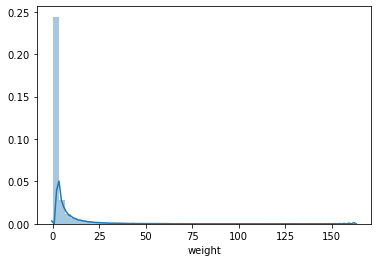

In [18]:
sns.distplot(train_sample["weight"])

In [19]:
train_sample["weight"].value_counts()

0.000000     17072
20.358361        1
0.413343         1
1.190655         1
0.199679         1
             ...  
6.530714         1
2.420262         1
0.264023         1
4.354974         1
0.206222         1
Name: weight, Length: 82929, dtype: int64

Weight feature is extremely right skewed since we have 17.072 (app. 17% of the data) values 0. It's kurtosis of 72 is also extremely high meaning there are lots of outliers.

I am creating cumulative sums on resp values to visualise the trend.

In [20]:
cumsum_df = pd.DataFrame()
cumsum_df["resp_1"] = train_sample['resp_1'].cumsum()
cumsum_df["resp_2"] = train_sample['resp_2'].cumsum()
cumsum_df["resp_3"] = train_sample['resp_3'].cumsum()
cumsum_df["resp_4"] = train_sample['resp_4'].cumsum()
cumsum_df["resp"] = train_sample['resp'].cumsum()

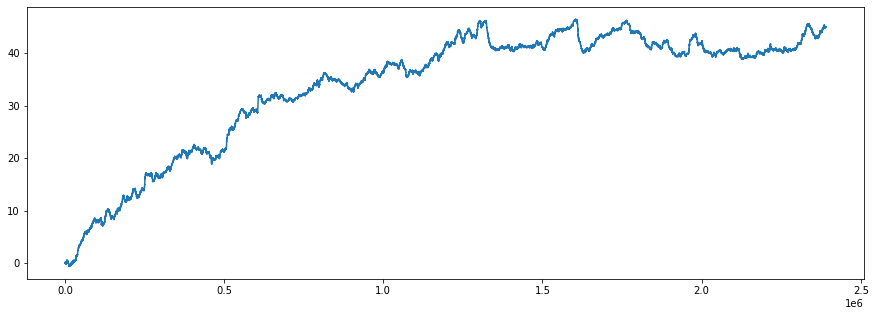

In [21]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
cumsum_df["resp"].plot()

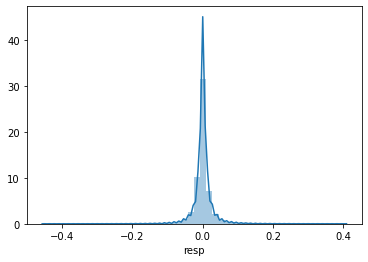

In [22]:
sns.distplot(train_sample["resp"])

Resp value trend is extremely positive. It is also distributed with low skewness and high kurtosis. Other resp features should be very similar. Let's compare them.

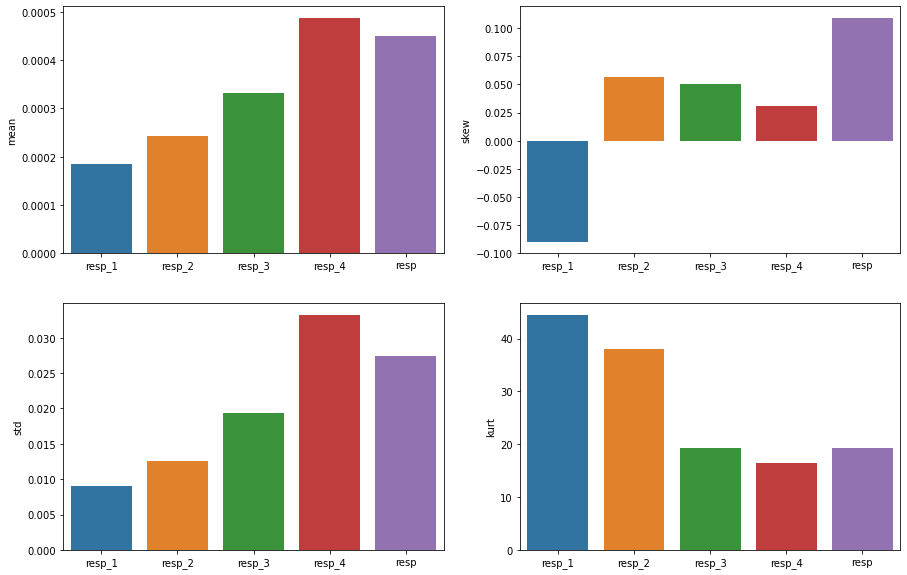

In [23]:
fig, ax = plt.subplots(2,2,figsize=(15,10))

eval_info.drop("weight", inplace=True)

sns.barplot(x=eval_info.index, y="mean", data=eval_info, ax=ax[0, 0])
sns.barplot(x=eval_info.index, y="std", data=eval_info, ax=ax[1, 0])
sns.barplot(x=eval_info.index, y="skew", data=eval_info, ax=ax[0, 1])
sns.barplot(x=eval_info.index, y="kurt", data=eval_info, ax=ax[1, 1])

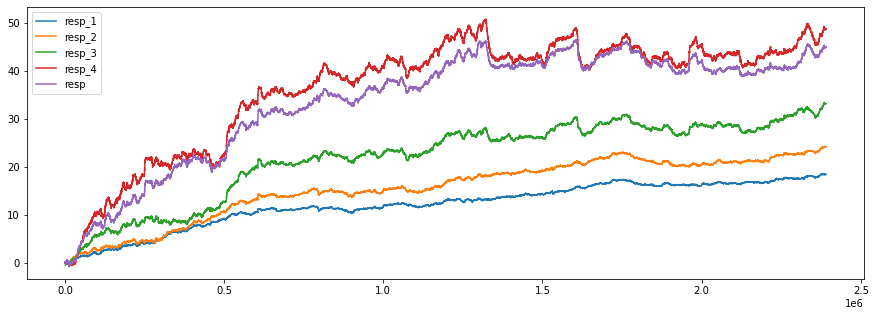

In [24]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
cumsum_df["resp_1"].plot()
cumsum_df["resp_2"].plot()
cumsum_df["resp_3"].plot()
cumsum_df["resp_4"].plot()
cumsum_df["resp"].plot()
plt.legend(loc="upper left")

Mean and standard deviation charts look very similar. Raising mean tells us the resp is growing over time, but the std is also growing resulting in higher risk.
Skewness remains in the margins of normal like distribution and kurtosis drop results in reduction of outliers over time, however the number is still high - we should expect outliers.

Comparing all the resp values indicates that the resp_4 and resp value should be swapped to make resp values chronological.

I will create new feature named "action" for easier data visualisation. If resp > 0 then 1, otherwise 0.

In [25]:
train_sample["action"] = train_sample["resp"].apply(lambda x: 1 if x > 0 else 0)

<a id="section-2.2"></a>
## 2.2 Anonymized features ##

In [26]:
anony_info = df_info.loc[anonymized_features]
anony_info

type  missing_count  missing_perc  unique      skew  \
feature_0      int32              0       0.00000       2 -0.021522   
feature_1    float64              0       0.00000   78631  2.008628   
feature_2    float64              0       0.00000   92525  2.772530   
feature_3    float64             15       0.00015   75008 -0.081490   
feature_4    float64             15       0.00015   97434 -0.070631   
...              ...            ...           ...     ...       ...   
feature_125  float64            656       0.00656   99344  1.050061   
feature_126  float64            375       0.00375   99625  0.992623   
feature_127  float64            375       0.00375   99622  1.501507   
feature_128  float64             86       0.00086   99850  1.229738   
feature_129  float64             86       0.00086   99705  4.517400   

                   kurt      corr  corr_p_value     count      mean       std  \
feature_0     -1.999577 -0.028341  3.137881e-19  100000.0  0.010760  0.999947   
feature_1     13.259812  0.027332  5.390079e-18  100000.0  0.380708  2.564814   
feature_2     39.667875  0.020966  3.340896e-11  100000.0  0.356740  2.498468   
feature_3      4.139752  0.002416  4.449811e-01   99985.0  0.005676  1.940606   
feature_4      3.397119  0.001435  6.500894e-01   99985.0  0.001157  1.751024   
...                 ...       ...           ...       ...       ...       ...   
feature_125    3.542066  0.002533  4.247355e-01   99344.0  0.253929  2.251776   
feature_126    2.609885  0.020476  1.023804e-10   99625.0  0.336010  2.534580   
feature_127    7.112549  0.004719  1.363418e-01   99625.0  0.241081  1.806054   
feature_128    4.570023  0.021211  2.008892e-11   99914.0  0.341178  2.308830   
feature_129  185.281165  0.006226  4.906732e-02   99914.0  0.255804  1.808478   

                   min       25%       50%       75%         max  
feature_0    -1.000000 -1.000000  1.000000  1.000000    1.000000  
feature_1    -3.172026 -1.305471 -0.001308  1.574759   55.701692  
feature_2    -3.093182 -1.262370  0.001080  1.531664   89.892920  
feature_3   -23.353321 -1.027896 -0.001273  1.036604   20.491296  
feature_4   -17.557989 -0.986078 -0.002043  0.985419   15.337863  
...                ...       ...       ...       ...         ...  
feature_125  -7.057092 -1.203917  0.003668  1.424365   33.901458  
feature_126  -7.381450 -1.456804 -0.011360  1.765620   34.867755  
feature_127  -5.002621 -0.890532  0.004538  1.118665   28.870913  
feature_128  -5.951259 -1.275015 -0.008738  1.585503   38.150775  
feature_129  -4.768938 -0.845300  0.008471  1.135607  116.456770  

[130 rows x 16 columns]

There are 130 numerical values and as we already mentioned, the first one is binary.

First I will plot the values ranges.

Text(0, 0.5, 'min / max')

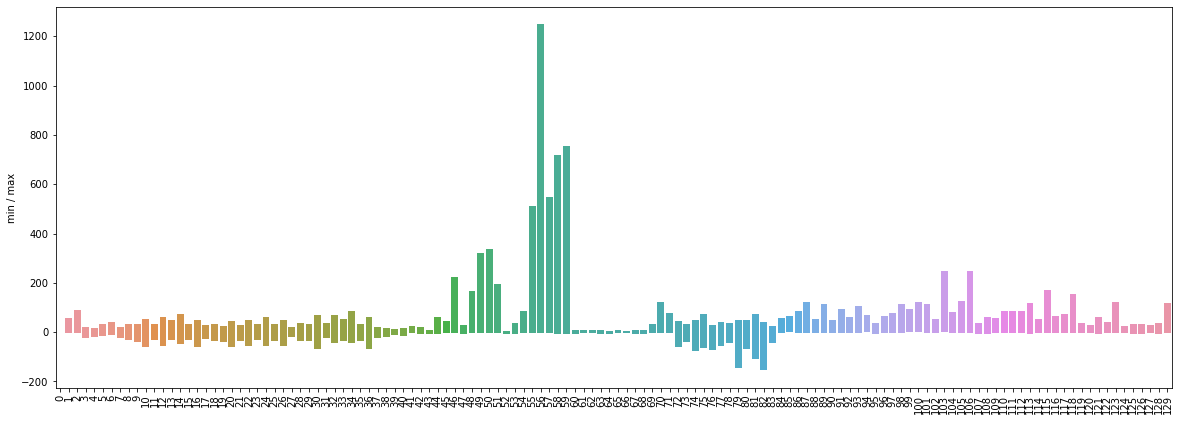

In [27]:
fig, ax = plt.subplots(1,1,figsize=(20,7))
sns.barplot(x=anony_info.index, y="min", data=anony_info)
sns.barplot(x=anony_info.index, y="max", data=anony_info)

ax.set_xticklabels(range(0,130), rotation=90)
ax.set_ylabel('min / max')

Majority of features remain between 100 and -100, however there are a few far above those margins. Features 55 to 59 seem similar.

Now let's take a look at the number of unique values and missing values.

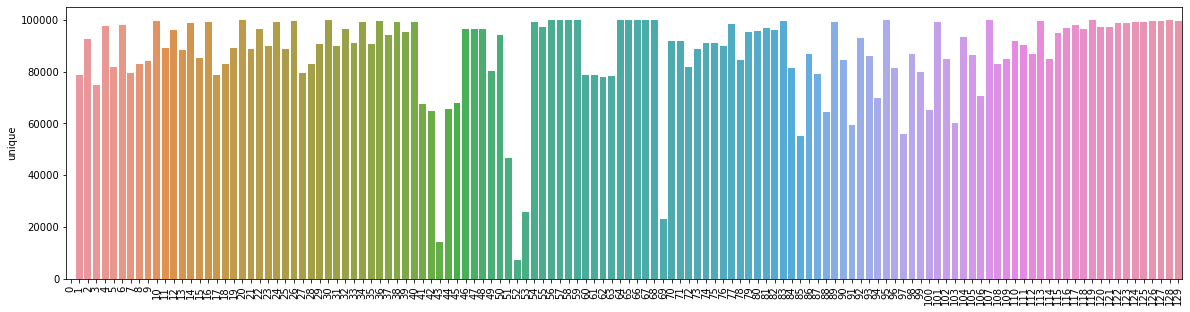

In [28]:
#Number of unique values
fig, ax = plt.subplots(1,1,figsize=(20,5))
sns.barplot(x=anony_info.index, y="unique", data=anony_info)

ax = ax.set_xticklabels(range(0,130), rotation=90)

There are lots of unique values in most features which indicates most features are continuos, however some of them stand out. Those are feature 0, 43, 51, 52, 53 and 69 and they should be further inspected.

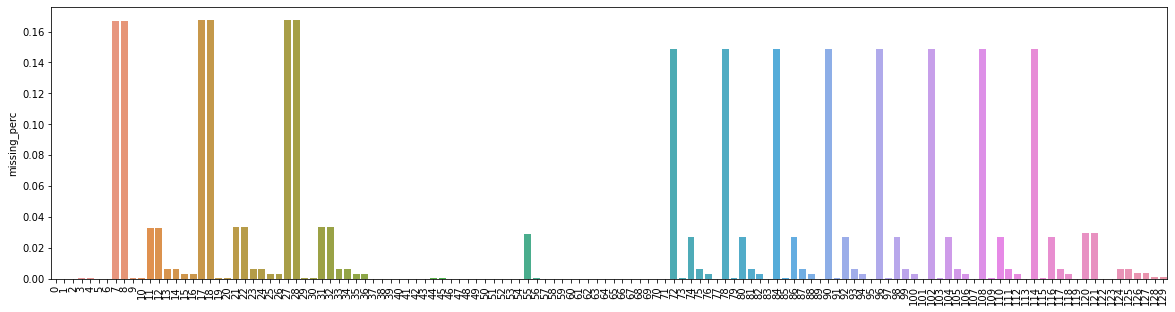

In [29]:
#Percentage of missing values
fig, ax = plt.subplots(1,1,figsize=(20,5))
sns.barplot(x=anony_info.index, y="missing_perc", data=anony_info)

ax = ax.set_xticklabels(range(0,130), rotation=90)

In [30]:
high_missing = anony_info[anony_info["missing_perc"] > 0.10].index
high_missing

Index(['feature_7', 'feature_8', 'feature_17', 'feature_18', 'feature_27',
       'feature_28', 'feature_72', 'feature_78', 'feature_84', 'feature_90',
       'feature_96', 'feature_102', 'feature_108', 'feature_114'],
      dtype='object')

Most of the features have less them 4% of missing values, but there are also some with more than 16%.

We can also see a clear pattern here indicating that some features could be grouped.

Possible feature groups:
- Feature 7 - 36 (30 features)
- Feature 72 - 119 (48 features)

Next I will take a look at the distribution moments.

[[]]

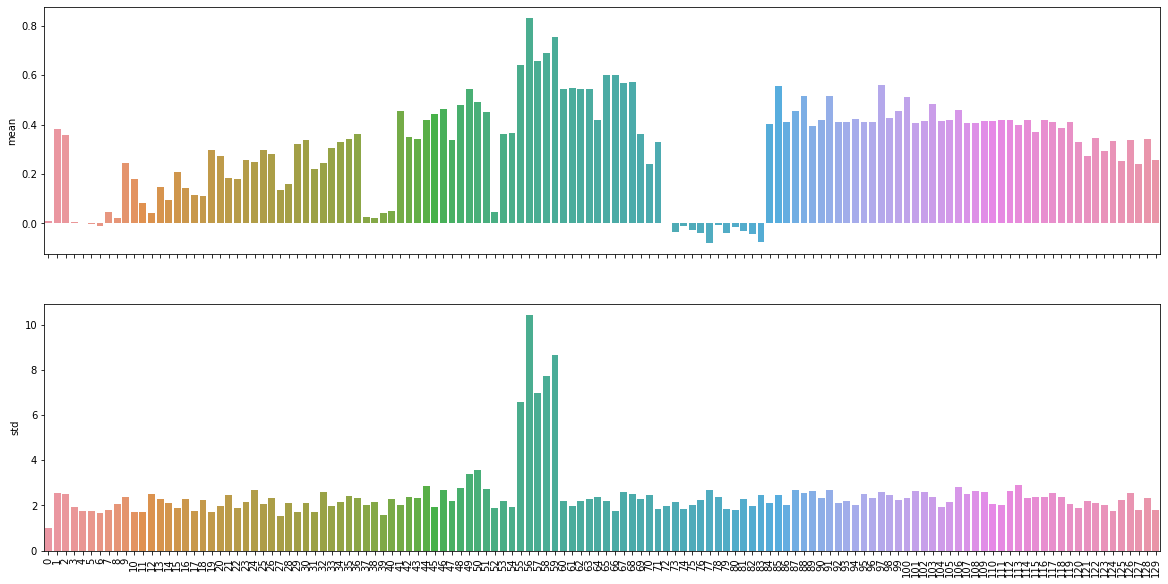

In [31]:
#Mean and standard deviation
fig, ax = plt.subplots(2,1,figsize=(20,10))

g1 = sns.barplot(x=anony_info.index, y="mean", data=anony_info, ax=ax[0])
g2 = sns.barplot(x=anony_info.index, y="std", data=anony_info, ax=ax[1])

g2.set_xticklabels(range(0,130), rotation=90)
g1.set(xlabel=None)
g1.set(xticklabels=[])

Mean values are very close to zero but there are some groups forming is the chart (features 72 to 83).
Some standard deviations are above 6 (features 55 - 59). 

[[]]

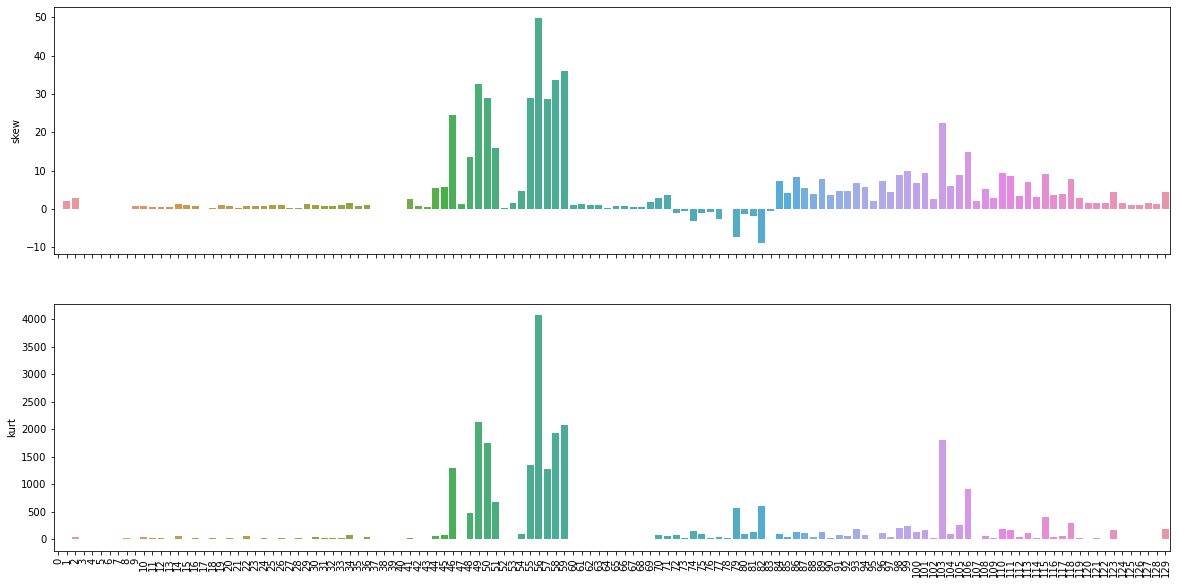

In [32]:
#Skewness and kurtosis
fig, ax = plt.subplots(2,1,figsize=(20,10))
g1 = sns.barplot(x=anony_info.index, y="skew", data=anony_info, ax=ax[0])
g2 = sns.barplot(x=anony_info.index, y="kurt", data=anony_info, ax=ax[1])
g2.set_xticklabels(range(0,130), rotation=90)
g1.set(xlabel=None)
g1.set(xticklabels=[])

Skewness of most features is far above +/- 0.5 (threshold for normal distribution). There are also many high values of kurtosis, meaning we will have to deal with outliers.
Again we can see the group of features 55-59, which should be further inspected as a group.

But first I will take a look at the correlation to the target feature.

[[]]

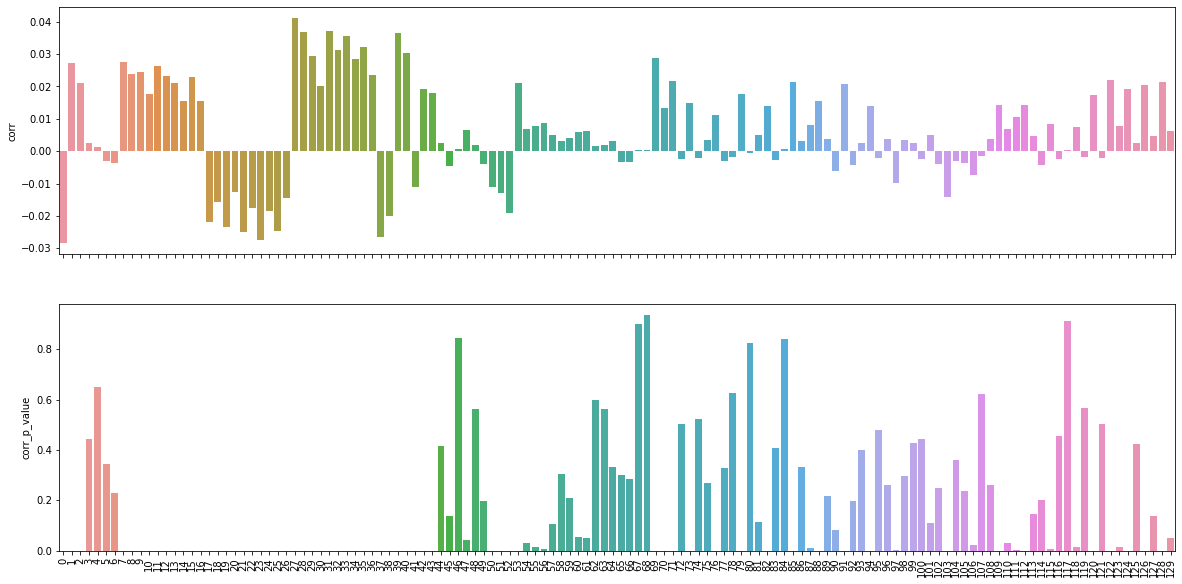

In [33]:
fig, ax = plt.subplots(2,1,figsize=(20,10))
g1 = sns.barplot(x=anony_info.index, y="corr", data=anony_info, ax=ax[0])
g2 = sns.barplot(x=anony_info.index, y="corr_p_value", data=anony_info, ax=ax[1])
g2.set_xticklabels(range(0,130), rotation=90)
#g1.set_xticklabels(range(0,130), rotation=90)
g1.set(xlabel=None)
g1.set(xticklabels=[])

There seems to be no correlation to target feature, since the highest coefficient value is around 0.04. Again we can see some features groups forming.

Next I will take a look at the correlation between anonymous features themselves, I will also use features dataframe.
But first I am filling the missing values with mean for faster calculation.

In [34]:
#Fill missing values
for i in range(0, 130):
    feat = "feature_{}".format(i)
    train_sample[feat].fillna(train_sample[feat].mean(), inplace=True)

## Correlations of anonymous features ##

In [35]:
#Correlation function

def show_corr_heatmap(df, method="pearson", width=10, calc_corr=False, annot=True):
    
    if calc_corr == True:
        if method == "MI":
            corr = MI_correlations(df)
        else:
            corr = df.corr(method)
    else:
        corr = df
        
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(width, width))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=annot, fmt=".2f")
    
    if calc_corr == True:
        return corr


def MI_correlations(df):
    corrs = {}
    for col_init in df.columns:
        corrs[col_init] = {}
        for col_corr in df.columns:
            if col_init != col_corr:
                corrs[col_init][col_corr] = calc_MI(df[col_init], df[col_corr])

    return pd.DataFrame(corrs)

def calc_MI(col_init, col_corr):
    
    if col_init.dtype == np.object:
        col_init = col_init.astype('category').cat.codes
    elif col_init.dtype.name == "category":
        col_init = col_init.cat.codes
        
    if col_corr.dtype == np.object:
        col_corr = col_corr.astype('category').cat.codes
    elif col_corr.dtype.name == "category":
        col_corr = col_corr.cat.codes

    mi = mutual_info_score(col_init, col_corr)

    return mi

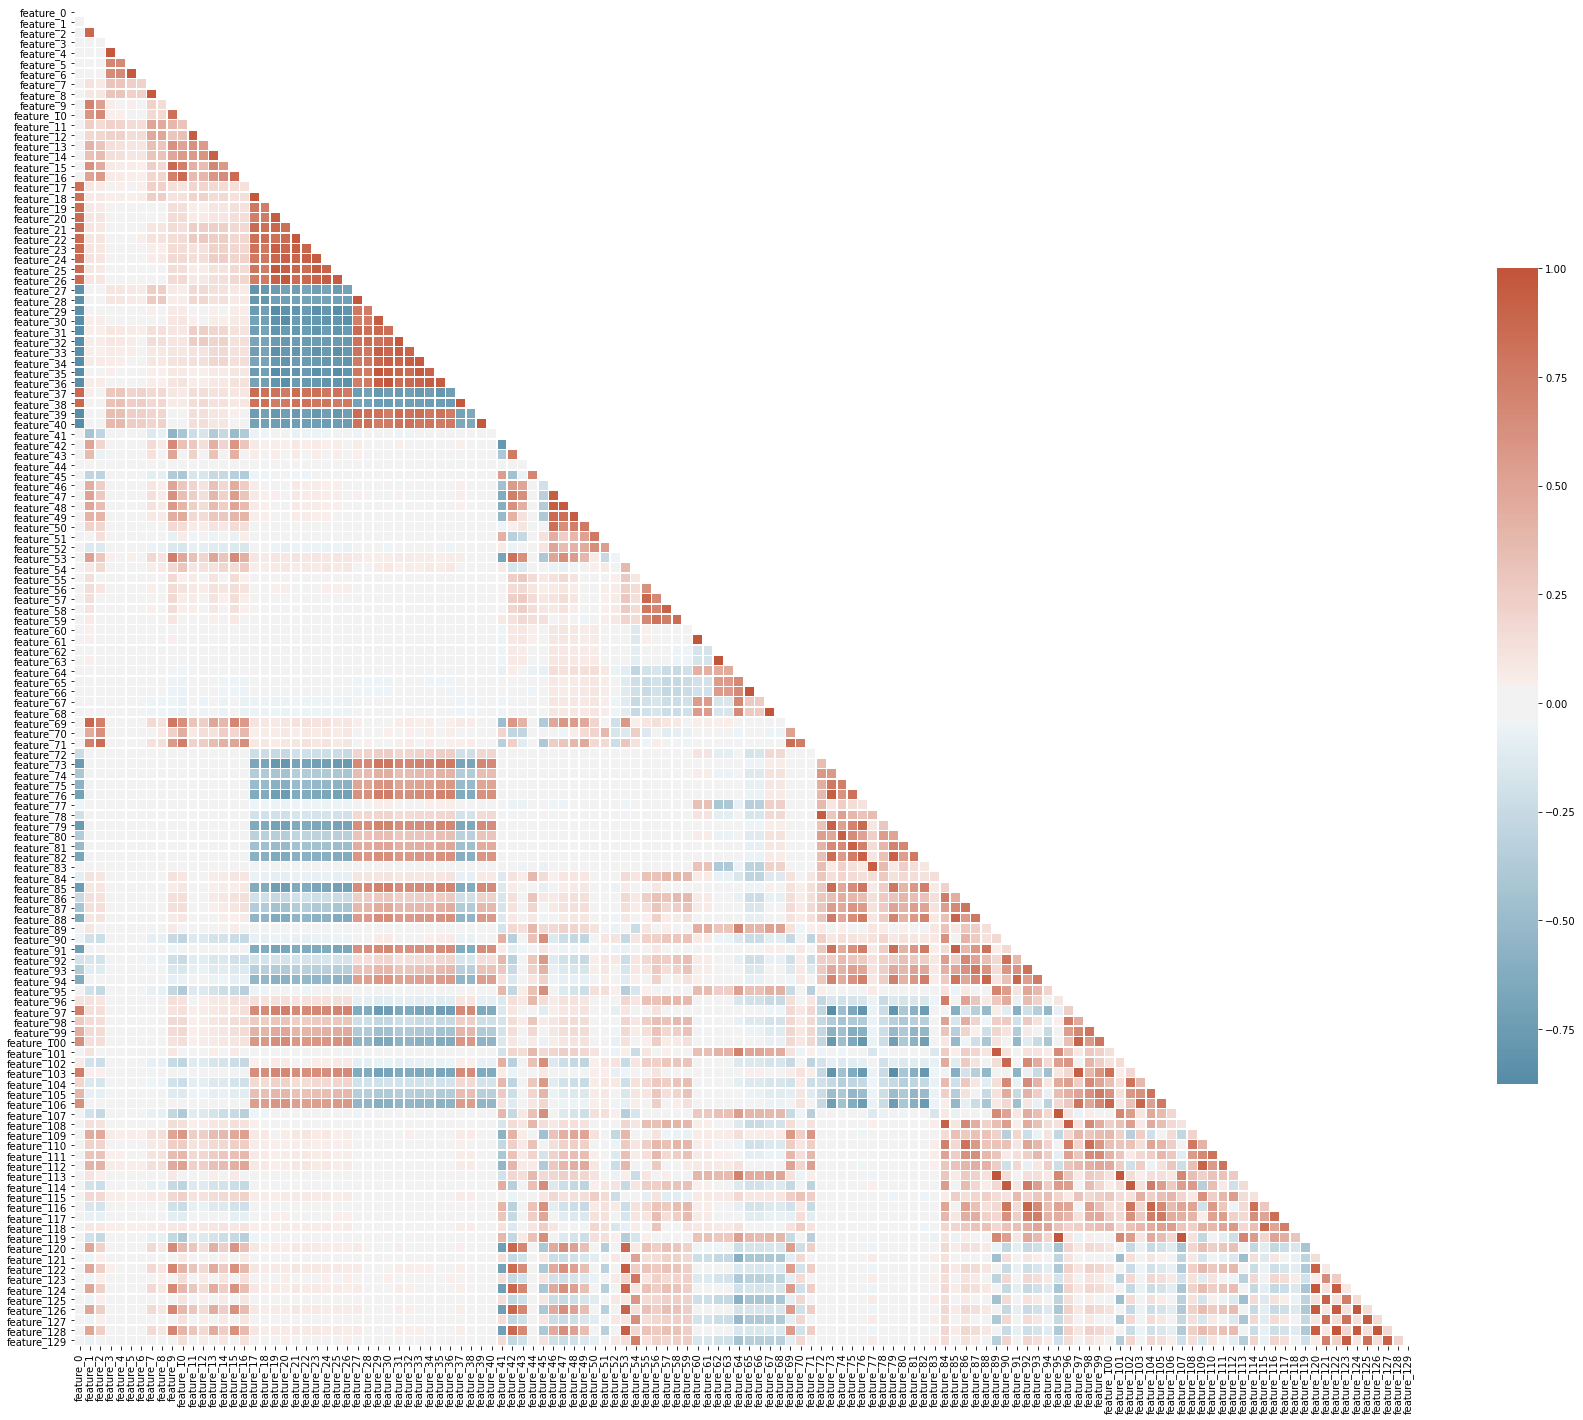

In [36]:
#Calculate correlation matrix using custom function
corr_matrix = show_corr_heatmap(train_sample[anonymized_features], method="spearman", width=30, calc_corr=True, annot=False)

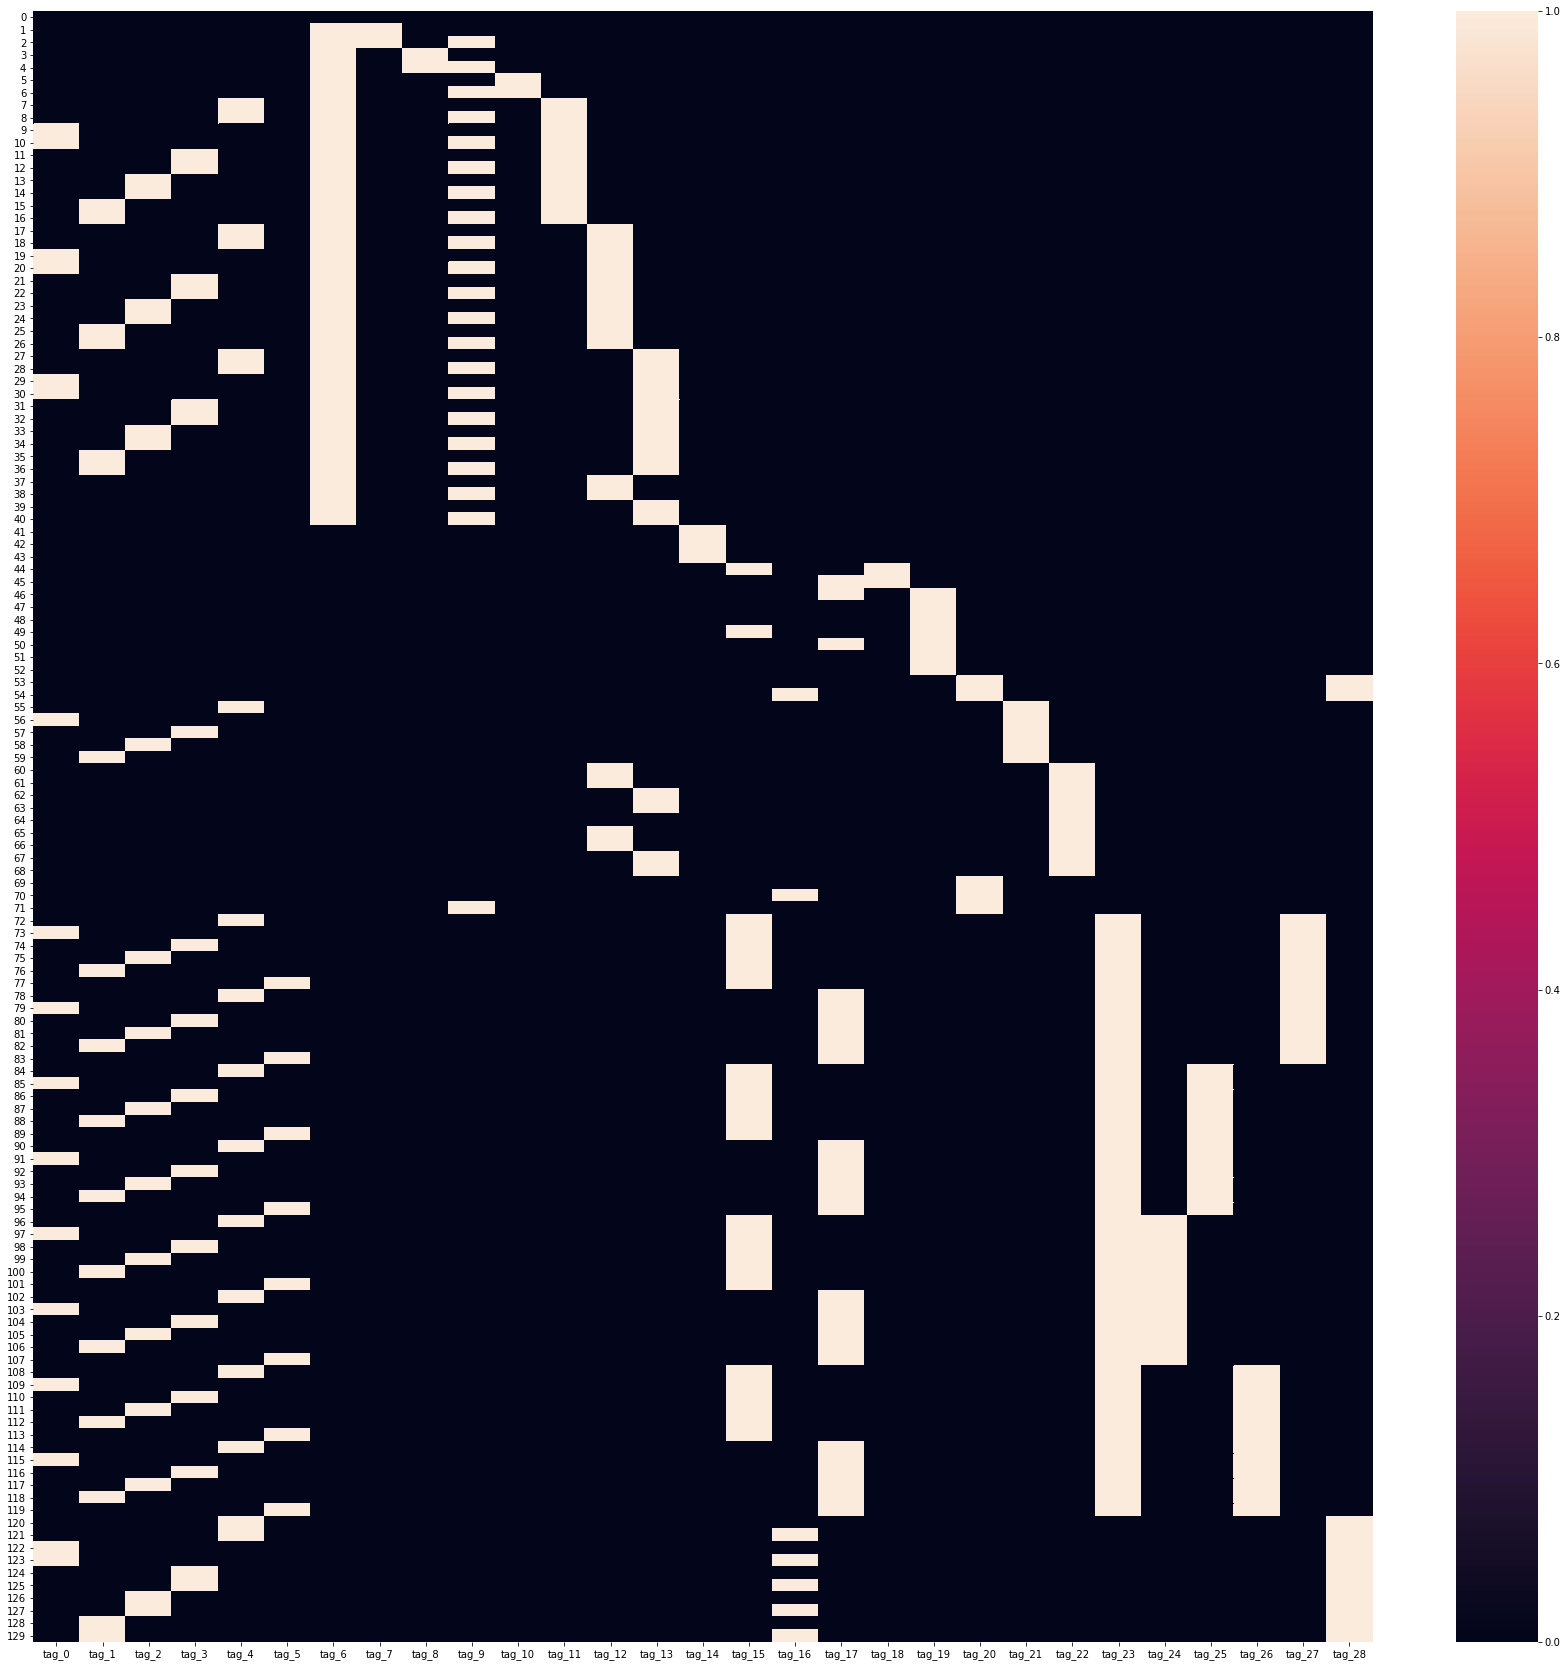

In [37]:
#Features dataframe heatmap
fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(features.iloc[:,1:])

Correlation matrix is really large and confusing but there are clearly some patterns. I will cut it in parts for easier understanding and compare it to features dataframe.

### Feature 0 - 40 ###

According to the correlation matrix and features df it seem like a good first step. My goal is to decode the features tags.

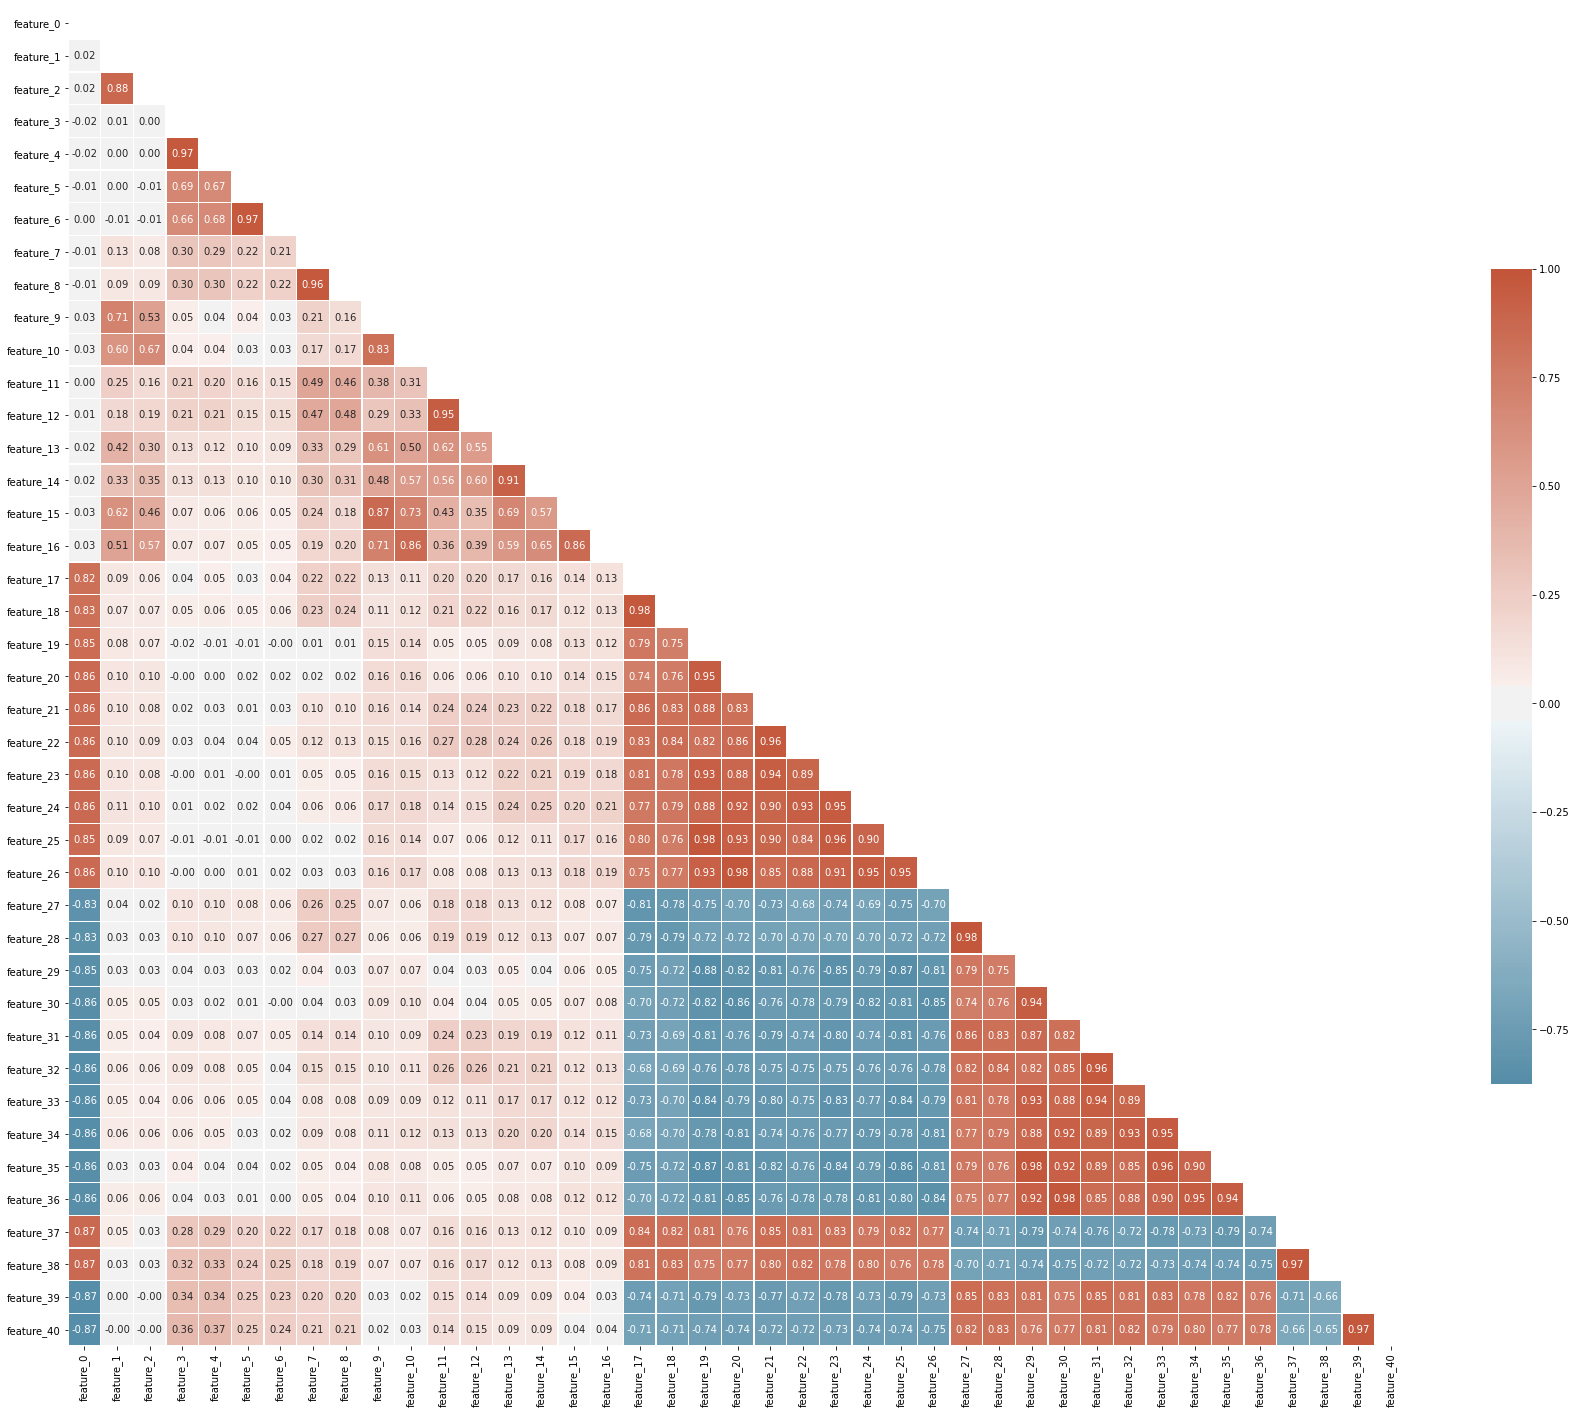

In [38]:
show_corr_heatmap(corr_matrix.iloc[0:41, 0:41], width=30)

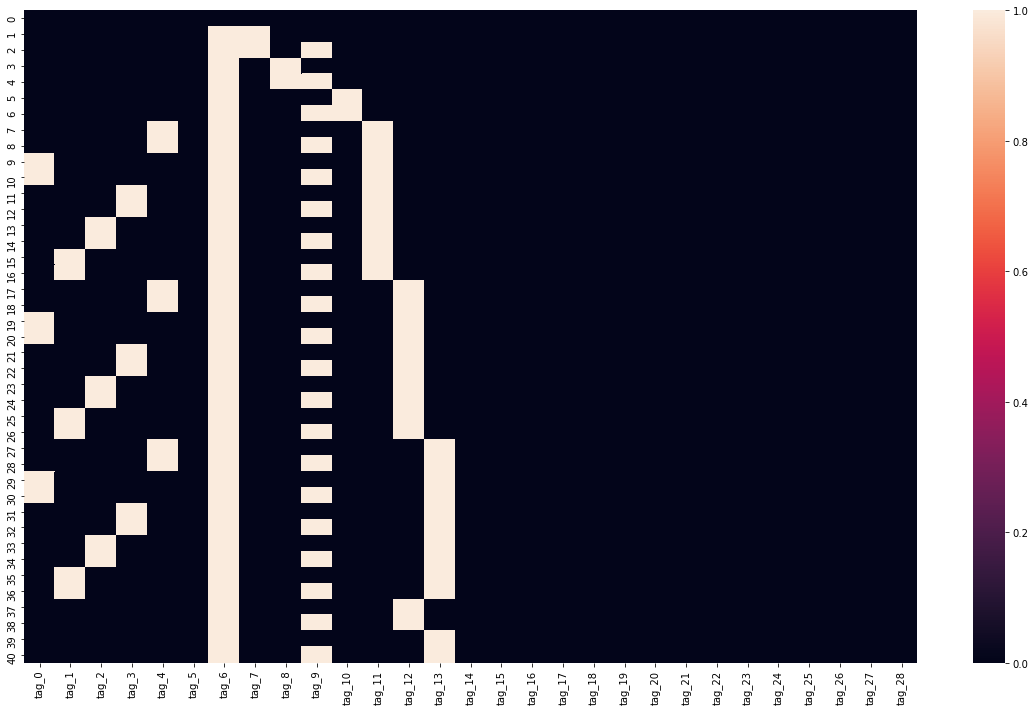

In [39]:
fig, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(features.iloc[:41,1:])

Highlights:
- Feature 0 is binary and has strong correlation with features 17-40.
- Odd features from 1 to 39 are strong positive correlated to even features 2 to 40 - tag 9 could be indicating this
- Features group 17-26 & 37-38 and group 27-36 & 39-40 are all strong positive correlated, however both groups are strong negative correlated between each other
- There should be used only one feature in the range 17-40 due to mutual correlations

Tags Decoding:
- Tags 0 to 4 could represent different resp values
- The features in tag 4 also have high percentage of missing values
- Alternating tag 9 could be representing the strong odd/even features correlation, therefore we should use one or another
- Tag 6 could be representing first main category of features
- Tags 7, 8, 10, 11, 12 and 13 could be the subcategory of 6 due to their features mutual correlation

In [40]:
#Possible feature groups, add 1 to get even values

g1_feat = [1, [3, 5]]
g1_feat_1 = [7, [17, 27]] #add 2 to get other resp values

### Feature 41 - 71 ###

This is my second group according to the correlation matrix and the lack of correlation between features 41-71 to 17-40.

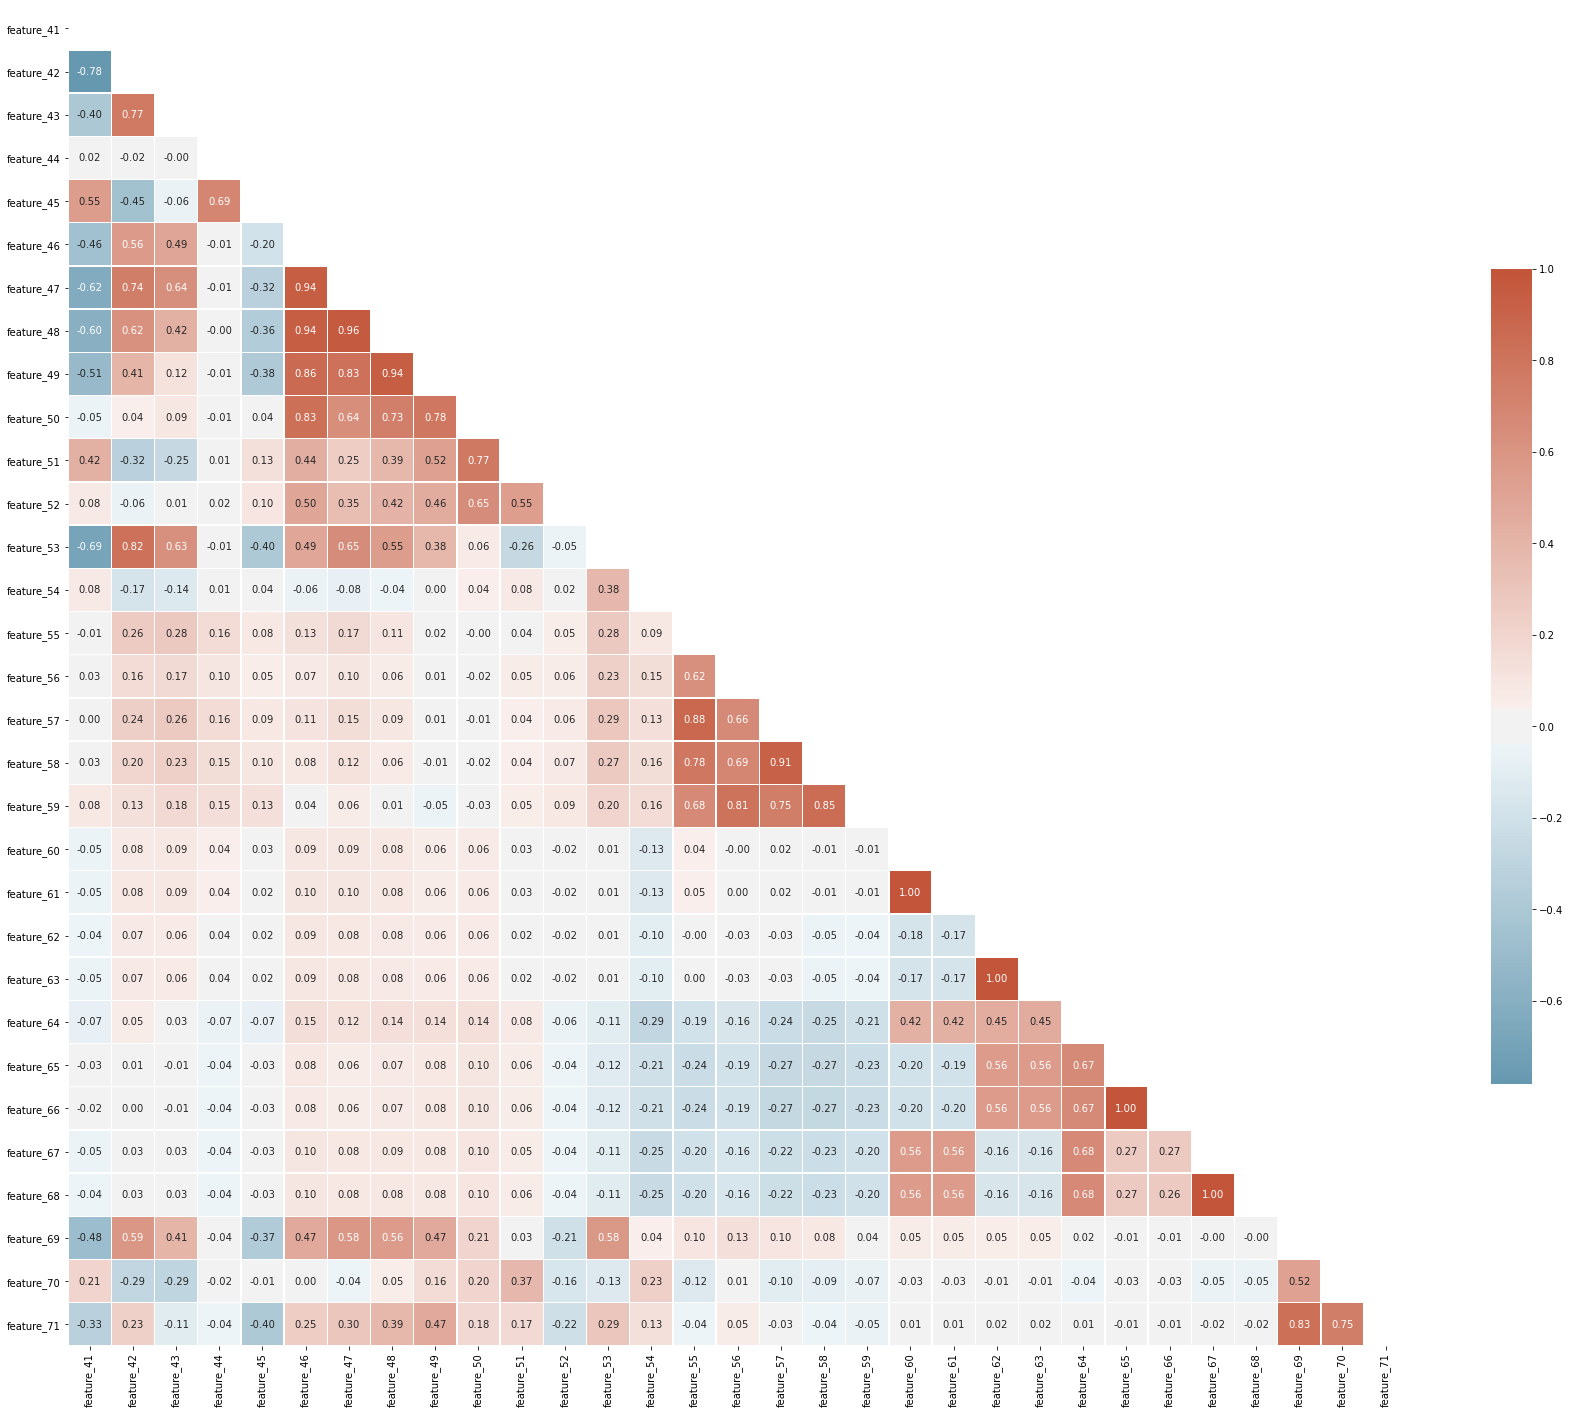

In [41]:
show_corr_heatmap(corr_matrix.iloc[41:72, 41:72], width=30)

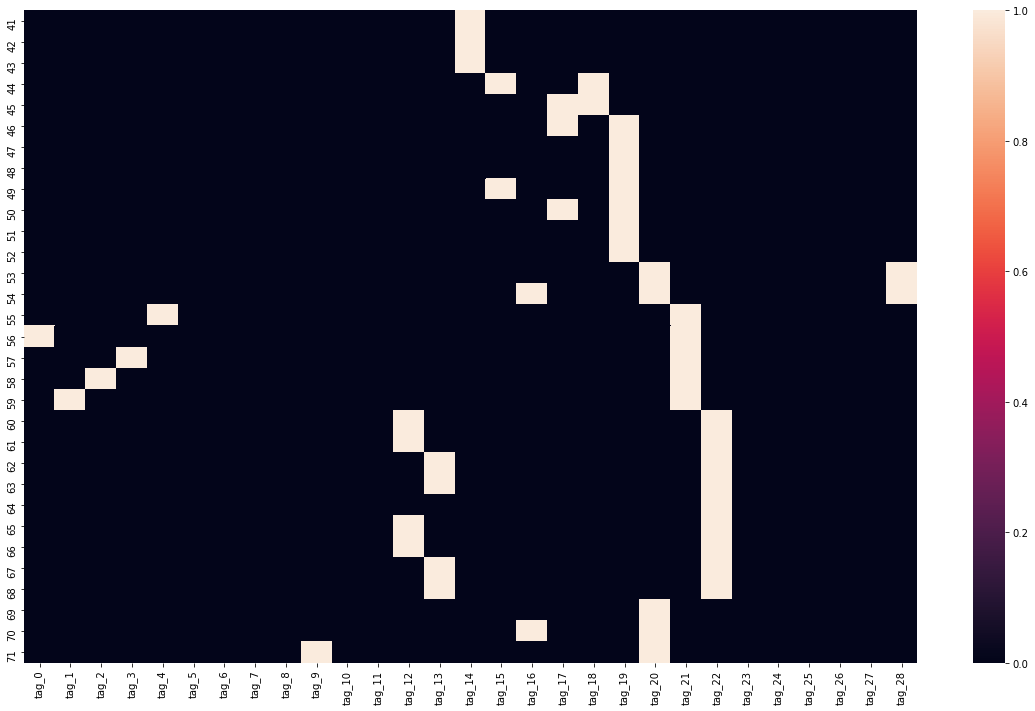

In [42]:
fig, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(features.iloc[41:72,1:])

Highlights:
- High correlation between features 46 - 52, grouped in tag 19
- High correlation between features 55 - 59, those are also categorized in tag 0 - 4 (resp?). Also grouped by tag 21. They have much higher std/skew/kurtosis then the other columns.
- Feature 44 has one one good correlation in this group - feature 45, could be related to tag 15
- There is a clear pattern between features 60 - 68, they are all tagged with 12 and 13, which were also positive correlated in the previous group. The exception is feature 64.
- Good correlation between features 69 - 71 grouped in tag 20. Feature 70 and 71 could have alternating tag 9 like in previous group

In [43]:
#Possible feature groups

g2_feat = [[41, 42, 43, 53], [44, 45], [46, 47, 48, 49, 50, 51, 52], 54, [60, 61], [62, 63], 64, [65, 66], [67, 68], [69, 70, 71]]
g2_feat_1 = [55] #add 1 to get other resp values

### Feature 72 - 119 ###

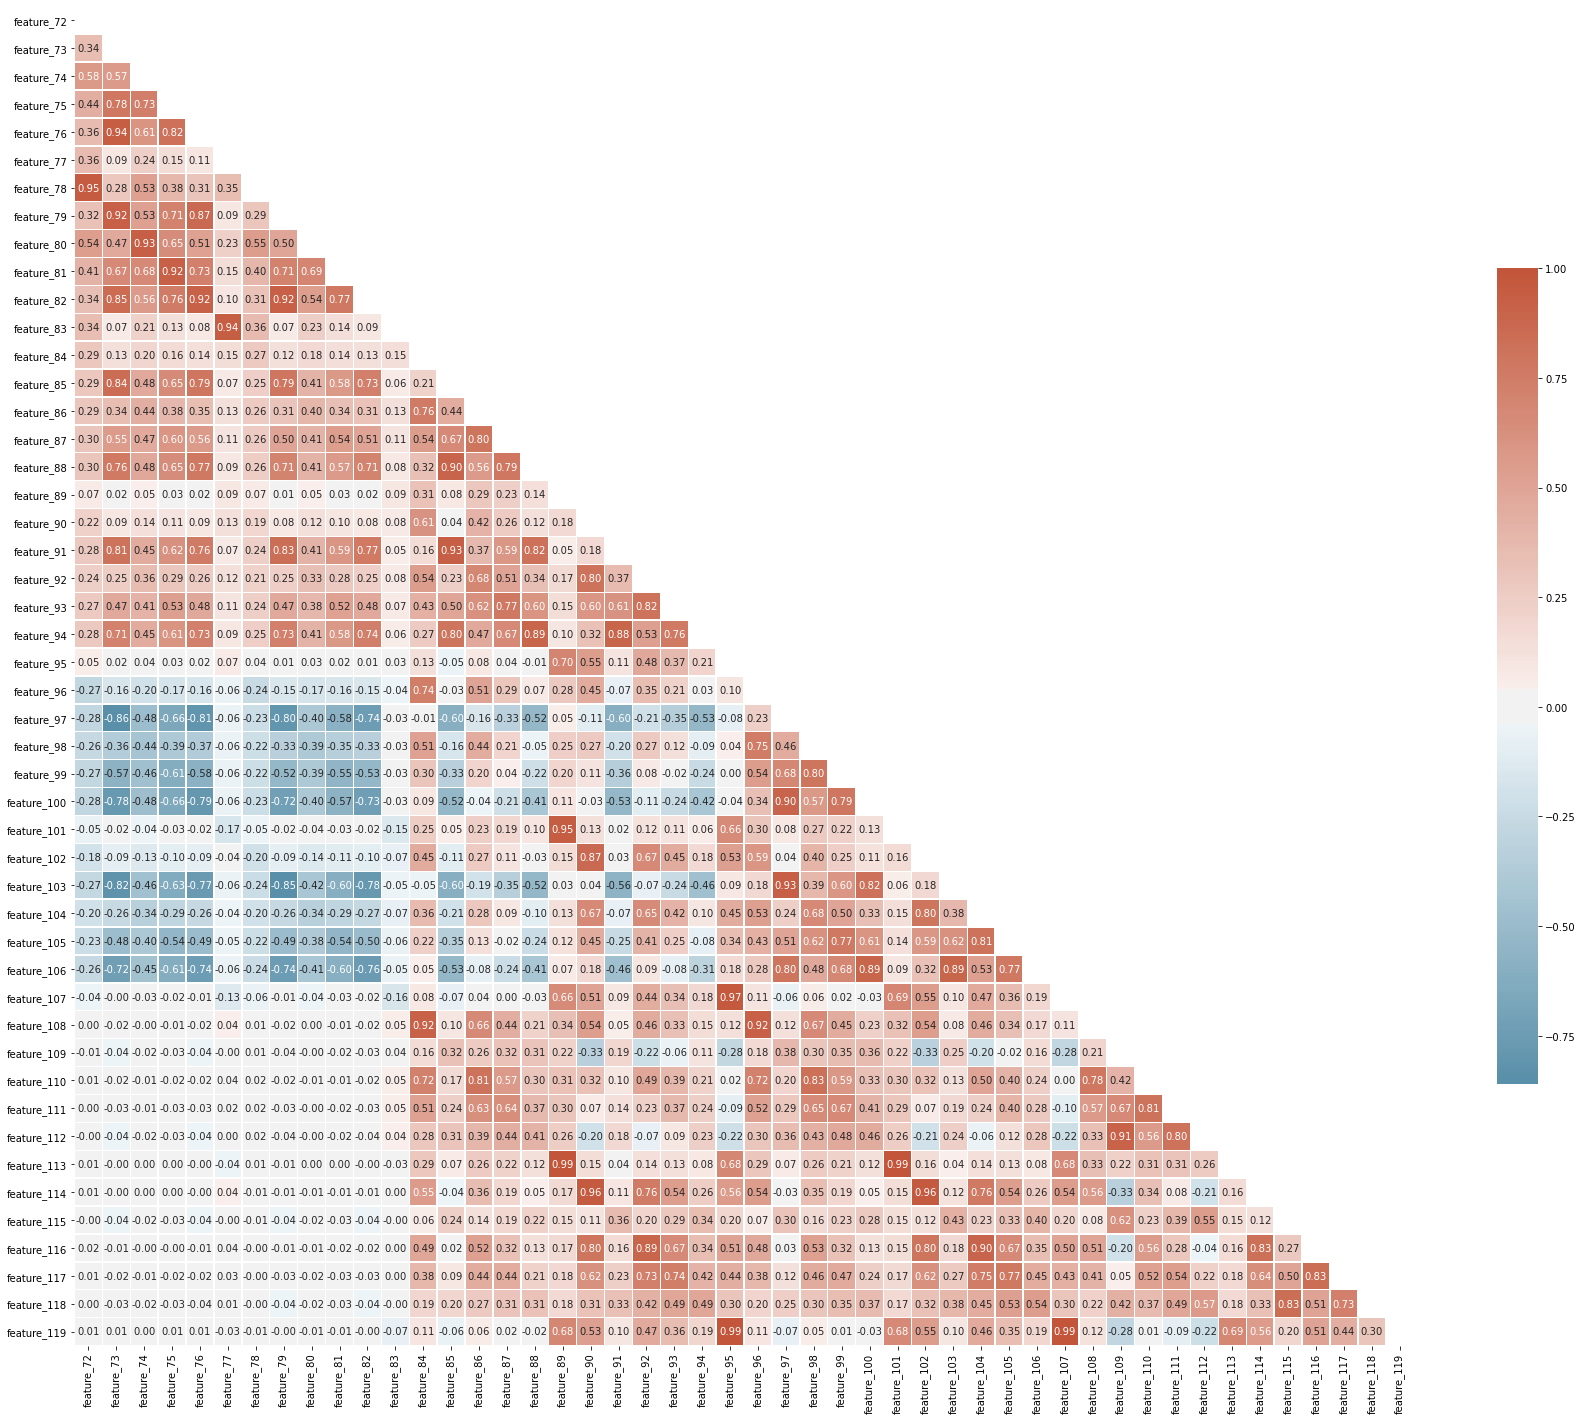

In [44]:
show_corr_heatmap(corr_matrix.iloc[72:120, 72:120], width=30)

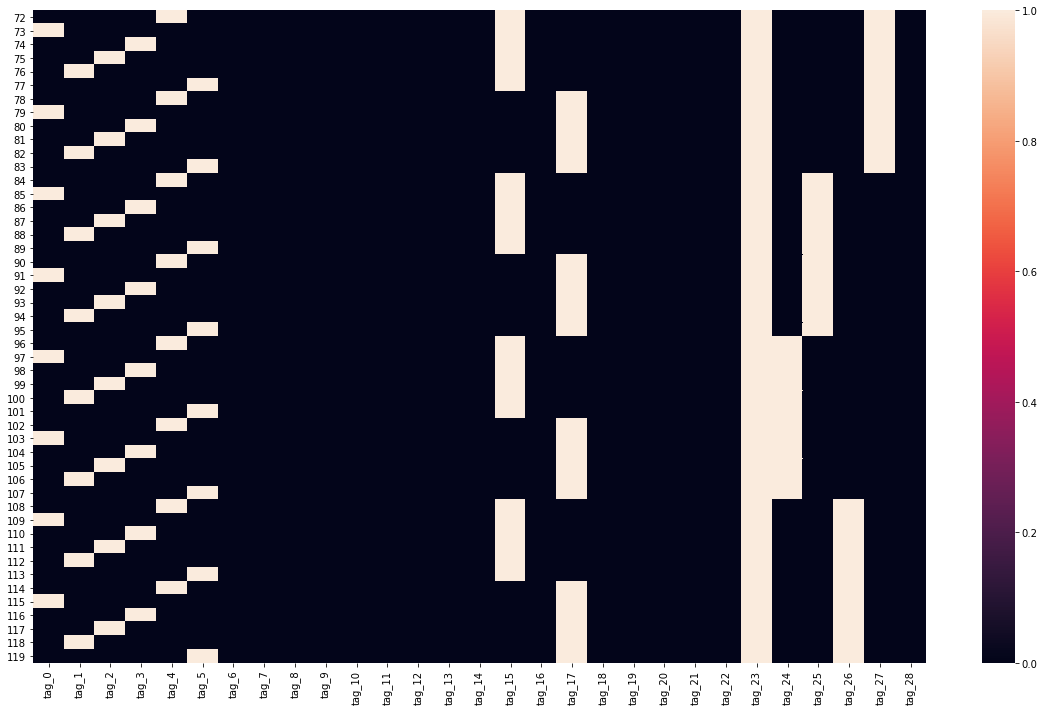

In [45]:
fig, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(features.iloc[72:120,1:])

Highlights:
- Tag 23 is the category for this group of features
- Tags 24, 25, 26 and 27 are subcategories, the correlation also indicates this split
- Tags 15 and 17 also split those subcategories
- Tags 0 - 4 could be indicating resp
- Features groups 72-77, 78-83, 84-89, 90-95, 96-101, 102-107, 108-113, 114-119 have the same pattern in missing values - they could show the same data
- High correlation between features 95, 107, 119 and 89, 101, 113 - only one combo of tag 5 / tag 15 and tag 17 / tag 24, 25 and 26 should be used
- Tag 15 and 17 features are also in a strong correlation, meaning only features in one of those tags should be used

In [46]:
#Possible feature groups

g3_feat = [[77, 83], [89, 95, 101], [107, 113, 119]] #last 2 elements can be grouped
g3_feat_1 = [[72, 78], [84, 96, 108], [90, 102, 114]] #add 1 at first element to get other resp values, last 2 elements can be grouped

### Feature 120 - 129 ###

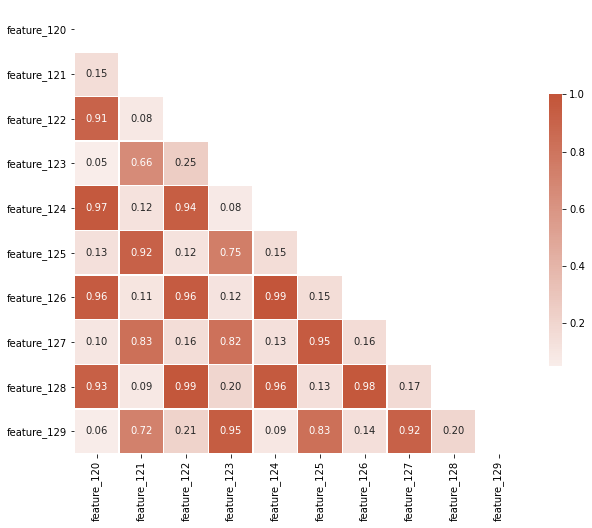

In [47]:
show_corr_heatmap(corr_matrix.iloc[120:130, 120:130])

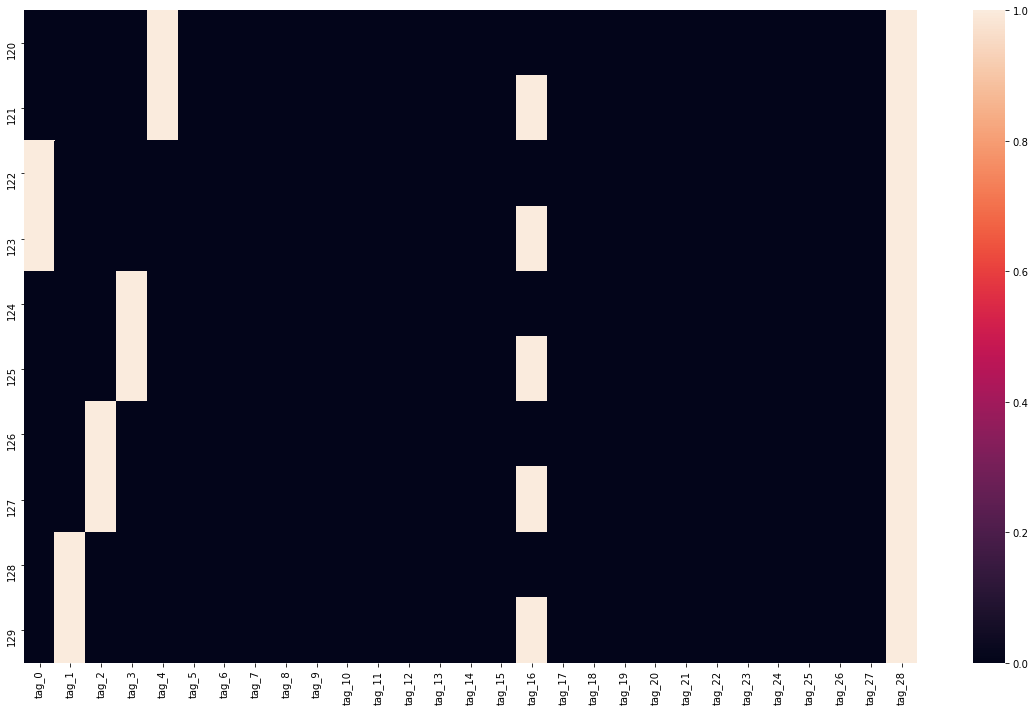

In [48]:
fig, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(features.iloc[120:130,1:])

Highlights:
- Even features 120, 122, 124, 126, 128 and odd ones 121, 123, 125, 127, 129 are strong positive correlated.
- The pattern again give us one more proof that tag 0 to 4 features are very similar and we should only use one of them

In [49]:
#Possible feature groups
g4_feat_1 = [120, 121] #add 2 to get other resp values

In [50]:
# All features groups
# g1_feat = [1, [3, 5]] #add 1 to get even values
# g2_feat = [[41, 42, 43, 53], [44, 45], [46, 47, 48, 49, 50, 51, 52], 54, [60, 61], [62, 63], 64, [65, 66], [67, 68], [69, 70, 71]]
# g3_feat = [[77, 83], [89, 95, 101], [107, 113, 119]] #last 2 elements can be grouped

# g1_feat_1 = [7, [17, 27]] #add 2 to get other resp values, add 1 to get even values
# g2_feat_1 = [55] #add 1 to get other resp values
# g3_feat_1 = [[72, 78], [84, 96, 108], [90, 102, 114]] #add 1 to get other resp values, last 2 elements can be grouped
# g4_feat_1 = [120, 121] #add 2 to get other resp values

I will now plot cumulative sums for resp related features.

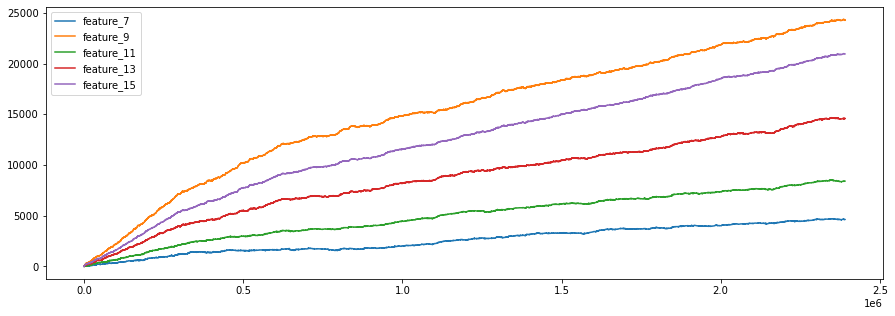

In [51]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
train_sample["feature_7"].cumsum().plot()
train_sample["feature_9"].cumsum().plot()
train_sample["feature_11"].cumsum().plot()
train_sample["feature_13"].cumsum().plot()
train_sample["feature_15"].cumsum().plot()
plt.legend(loc="upper left")

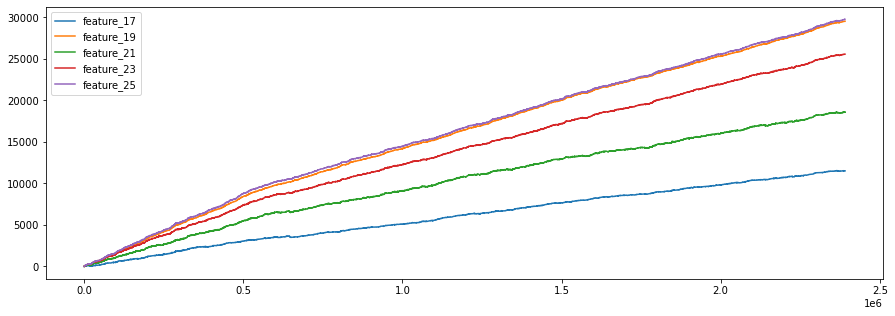

In [52]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
train_sample["feature_17"].cumsum().plot()
train_sample["feature_19"].cumsum().plot()
train_sample["feature_21"].cumsum().plot()
train_sample["feature_23"].cumsum().plot()
train_sample["feature_25"].cumsum().plot()
plt.legend(loc="upper left")

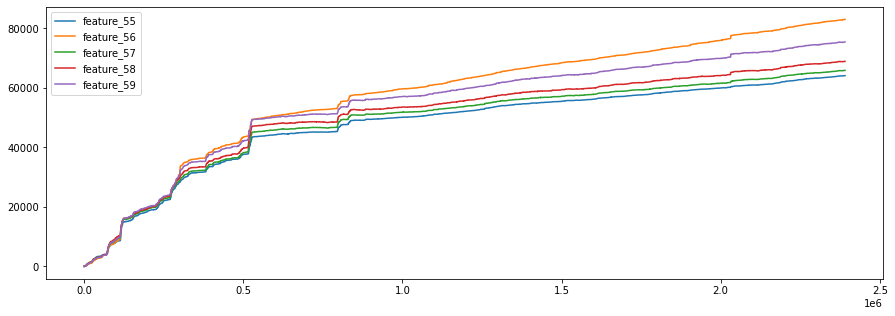

In [53]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
train_sample["feature_55"].cumsum().plot()
train_sample["feature_56"].cumsum().plot()
train_sample["feature_57"].cumsum().plot()
train_sample["feature_58"].cumsum().plot()
train_sample["feature_59"].cumsum().plot()
plt.legend(loc="upper left")

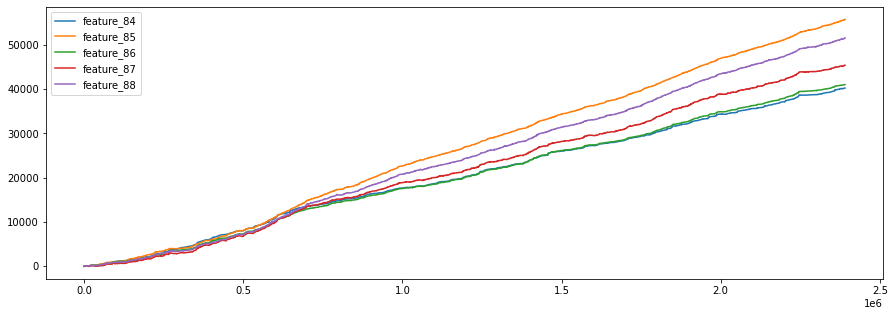

In [54]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
train_sample["feature_84"].cumsum().plot()
train_sample["feature_85"].cumsum().plot()
train_sample["feature_86"].cumsum().plot()
train_sample["feature_87"].cumsum().plot()
train_sample["feature_88"].cumsum().plot()
plt.legend(loc="upper left")

Comparing the charts above to the resp cumulative sum values, we can see that purple feature best corresponds to our resp value. Therefore we can make the following assumptions:
- Tag_0 = resp_4
- Tag_1 = resp
- Tag_2 = resp_3
- Tag_3 = resp_2
- Tag_4 = resp_1

Now I will go through all the features and select the most relavant.

All odd features in group 1 have their twins in even features, this is also indicated by tag_9. I will now plot some pairs, to get better insight into data.

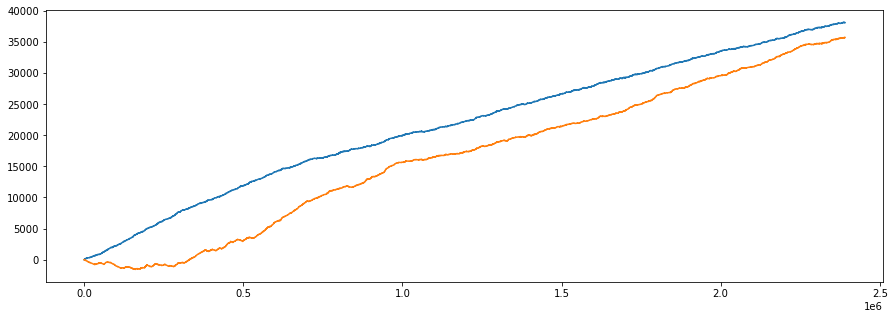

In [55]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
train_sample["feature_1"].cumsum().plot()
train_sample["feature_2"].cumsum().plot()

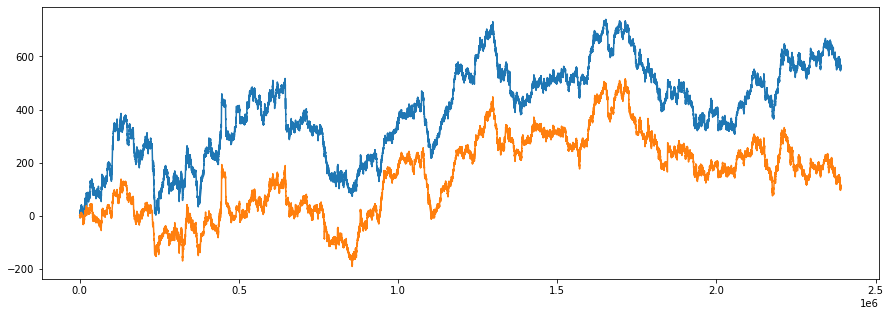

In [56]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
train_sample["feature_3"].cumsum().plot()
train_sample["feature_4"].cumsum().plot()

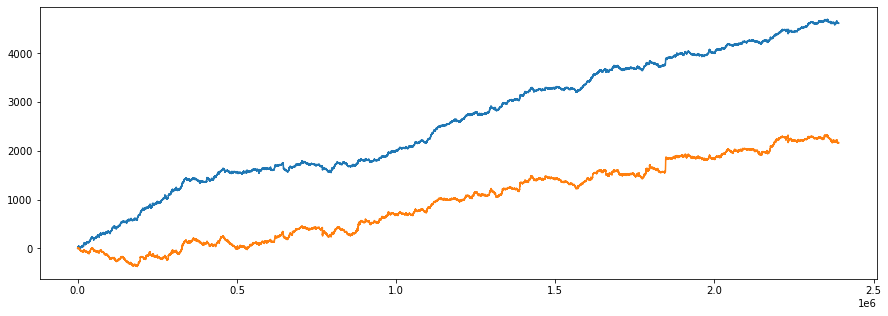

In [57]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
train_sample["feature_7"].cumsum().plot()
train_sample["feature_8"].cumsum().plot()

Looks like odd and even values act as some kind of boundaries, where odd values are upper boundary and even values are bottom boundary.

In [58]:
#Select between features 3 - 6
df_info.iloc[10:14,:]

type  missing_count  missing_perc  unique      skew      kurt  \
feature_3  float64             15       0.00015   75008 -0.081490  4.139752   
feature_4  float64             15       0.00015   97434 -0.070631  3.397119   
feature_5  float64              0       0.00000   81952  0.054024  4.480464   
feature_6  float64              0       0.00000   98052  0.108961  9.472606   

               corr  corr_p_value     count      mean       std        min  \
feature_3  0.002416      0.444981   99985.0  0.005676  1.940606 -23.353321   
feature_4  0.001435      0.650089   99985.0  0.001157  1.751024 -17.557989   
feature_5 -0.002993      0.343950  100000.0 -0.003544  1.733355 -14.407362   
feature_6 -0.003791      0.230645  100000.0 -0.012252  1.680632 -12.797365   

                25%       50%       75%        max  
feature_3 -1.027896 -0.001273  1.036604  20.491296  
feature_4 -0.986078 -0.002043  0.985419  15.337863  
feature_5 -0.922810  0.006248  0.930092  32.070594  
feature_6 -0.914456  0.005681  0.912927  40.125945

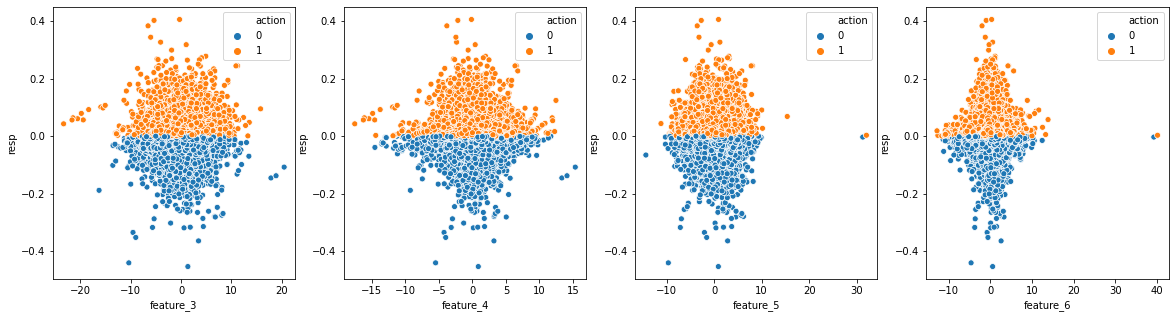

In [59]:
fig, ax = plt.subplots(1,4,figsize=(20,5))

sns.scatterplot(x="feature_3", y="resp", hue="action", data=train_sample, ax=ax[0])
sns.scatterplot(x="feature_4", y="resp", hue="action", data=train_sample, ax=ax[1])
sns.scatterplot(x="feature_5", y="resp", hue="action", data=train_sample, ax=ax[2])
sns.scatterplot(x="feature_6", y="resp", hue="action", data=train_sample, ax=ax[3])

Feature 3 / 4 is much better choice since it is more compact and has less outliers.

In [60]:
#Select between features 17 - 36
df_info.loc[["feature_25", "feature_26","feature_35", "feature_36"]]

type  missing_count  missing_perc  unique      skew       kurt  \
feature_25  float64            281       0.00281   88880  0.958931   8.963519   
feature_26  float64            281       0.00281   99593  0.953885  17.222483   
feature_35  float64            281       0.00281   90594  0.818391   6.032596   
feature_36  float64            281       0.00281   99622  1.089613  34.647381   

                corr  corr_p_value    count      mean       std        min  \
feature_25 -0.024570  8.491505e-15  99719.0  0.297635  2.086810 -35.470867   
feature_26 -0.014324  6.080936e-06  99719.0  0.280543  2.342544 -54.771387   
feature_35  0.032038  4.520837e-24  99719.0  0.339926  2.411191 -35.138773   
feature_36  0.023370  1.572536e-13  99719.0  0.361925  2.340966 -69.107601   

                 25%       50%       75%        max  
feature_25 -0.962248  0.005034  1.334524  34.252838  
feature_26 -1.167500  0.014567  1.542991  49.179891  
feature_35 -1.165185 -0.012475  1.636722  32.877007  
feature_36 -1.067856 -0.009595  1.623080  60.519439

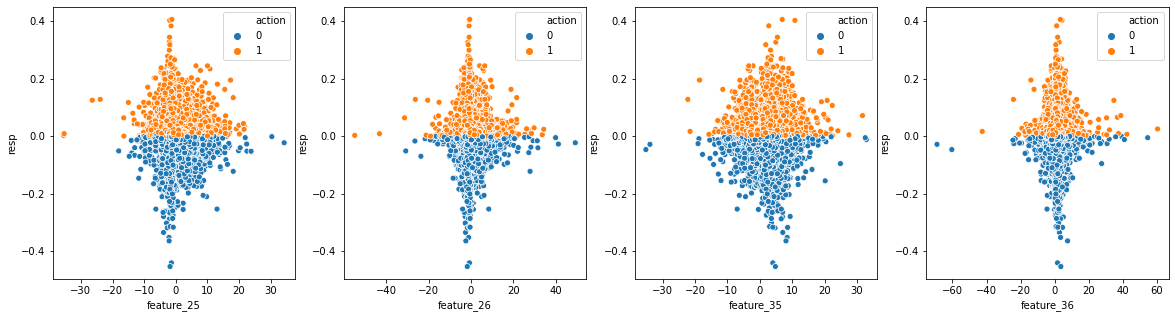

In [61]:
fig, ax = plt.subplots(1,4,figsize=(20,5))

sns.scatterplot(x="feature_25", y="resp", hue="action", data=train_sample, ax=ax[0])
sns.scatterplot(x="feature_26", y="resp", hue="action", data=train_sample, ax=ax[1])
sns.scatterplot(x="feature_35", y="resp", hue="action", data=train_sample, ax=ax[2])
sns.scatterplot(x="feature_36", y="resp", hue="action", data=train_sample, ax=ax[3])

I will take feature 35 since it has the lowest kurtosis, however it has relatively high skewness, therefore it will have to be transformed later.
From the first group we have selected the features [1, 3, 15, 35].

Now to the second group, which is much more complex.

In [62]:
selected_group_1 = [1, 3, 15, 35]

In [63]:
#Select between features 41 - 43, 53
df_info.loc[["feature_41", "feature_42","feature_43", "feature_53"]]

type  missing_count  missing_perc  unique      skew       kurt  \
feature_41  float64              0           0.0   67615  2.679197  15.523065   
feature_42  float64              0           0.0   64735  0.910381   1.515460   
feature_43  float64              0           0.0   14272  0.584952   0.051713   
feature_53  float64              0           0.0   25616  1.461855   5.989310   

                corr  corr_p_value     count      mean       std       min  \
feature_41 -0.010919  5.546468e-04  100000.0  0.454782  2.009736 -4.228167   
feature_42  0.019104  1.526526e-09  100000.0  0.351316  2.389584 -6.656764   
feature_43  0.017806  1.789799e-08  100000.0  0.340063  2.327900 -6.053608   
feature_53  0.021112  2.441287e-11  100000.0  0.359901  2.180046 -5.344403   

                 25%       50%       75%        max  
feature_41 -0.770837  0.001179  1.198918  25.844721  
feature_42 -1.374859 -0.014015  1.719246  19.093464  
feature_43 -1.378898 -0.005442  1.800536   9.841300  
feature_53 -1.142415 -0.008365  1.444289  35.705648

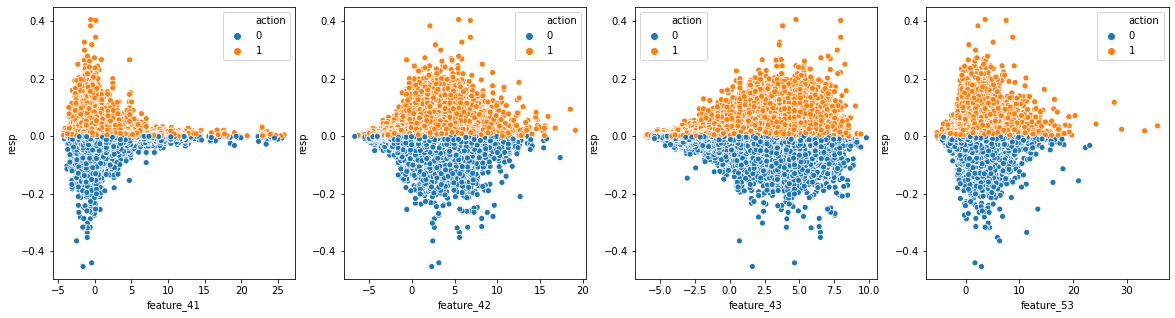

In [64]:
fig, ax = plt.subplots(1,4,figsize=(20,5))

sns.scatterplot(x="feature_41", y="resp", hue="action", data=train_sample, ax=ax[0])
sns.scatterplot(x="feature_42", y="resp", hue="action", data=train_sample, ax=ax[1])
sns.scatterplot(x="feature_43", y="resp", hue="action", data=train_sample, ax=ax[2])
sns.scatterplot(x="feature_53", y="resp", hue="action", data=train_sample, ax=ax[3])

In [65]:
#Select between features 44 - 45
df_info.loc[["feature_44", "feature_45"]]

type  missing_count  missing_perc  unique      skew       kurt  \
feature_44  float64             15       0.00015   65499  5.378166  69.438828   
feature_45  float64             15       0.00015   67899  5.832859  75.571150   

                corr  corr_p_value    count      mean       std       min  \
feature_44  0.002573      0.415860  99985.0  0.417936  2.866294 -6.956901   
feature_45 -0.004685      0.138523  99985.0  0.441389  1.939632 -2.796687   

                 25%       50%       75%        max  
feature_44 -1.100376 -0.002981  1.258417  60.058246  
feature_45 -0.564219  0.000981  0.839762  45.820225

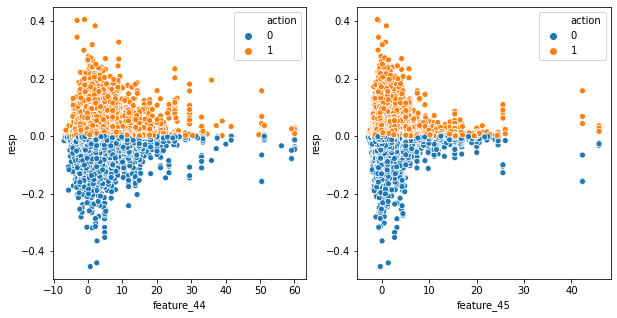

In [66]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

sns.scatterplot(x="feature_44", y="resp", hue="action", data=train_sample, ax=ax[0])
sns.scatterplot(x="feature_45", y="resp", hue="action", data=train_sample, ax=ax[1])

In [67]:
#Select between features 46 - 52
df_info.loc[["feature_46", "feature_47", "feature_48", "feature_49", "feature_50", "feature_51", "feature_52"]]

type  missing_count  missing_perc  unique       skew  \
feature_46  float64              0           0.0   96321  24.519523   
feature_47  float64              0           0.0   96282   1.188981   
feature_48  float64              0           0.0   96264  13.681412   
feature_49  float64              0           0.0   80200  32.630711   
feature_50  float64              0           0.0   94254  28.959820   
feature_51  float64              0           0.0   46561  15.816781   
feature_52  float64              0           0.0    7353   0.245531   

                   kurt      corr  corr_p_value     count      mean       std  \
feature_46  1296.307049  0.000614  8.461013e-01  100000.0  0.461672  2.695008   
feature_47     3.659932  0.006454  4.127227e-02  100000.0  0.339300  2.187613   
feature_48   480.889561  0.001835  5.617782e-01  100000.0  0.481249  2.785972   
feature_49  2139.221596 -0.004063  1.988735e-01  100000.0  0.543044  3.411043   
feature_50  1742.335209 -0.011031  4.860819e-04  100000.0  0.491300  3.569413   
feature_51   682.234341 -0.013014  3.863451e-05  100000.0  0.452096  2.735680   
feature_52    -0.570166 -0.018965  2.002229e-09  100000.0  0.045373  1.875741   

                 min       25%       50%       75%         max  
feature_46 -2.822520 -0.611877 -0.004144  0.883727  225.145255  
feature_47 -5.560372 -1.194976 -0.008192  1.495454   30.412859  
feature_48 -4.815750 -0.908665 -0.006857  1.261847  168.393026  
feature_49 -3.309811 -0.708600 -0.001953  1.108214  320.629314  
feature_50 -4.402541 -0.820640 -0.004571  1.088056  338.914265  
feature_51 -4.753165 -0.777182 -0.002166  1.004555  197.053881  
feature_52 -5.489147 -1.509645  0.039408  1.427235    6.435942

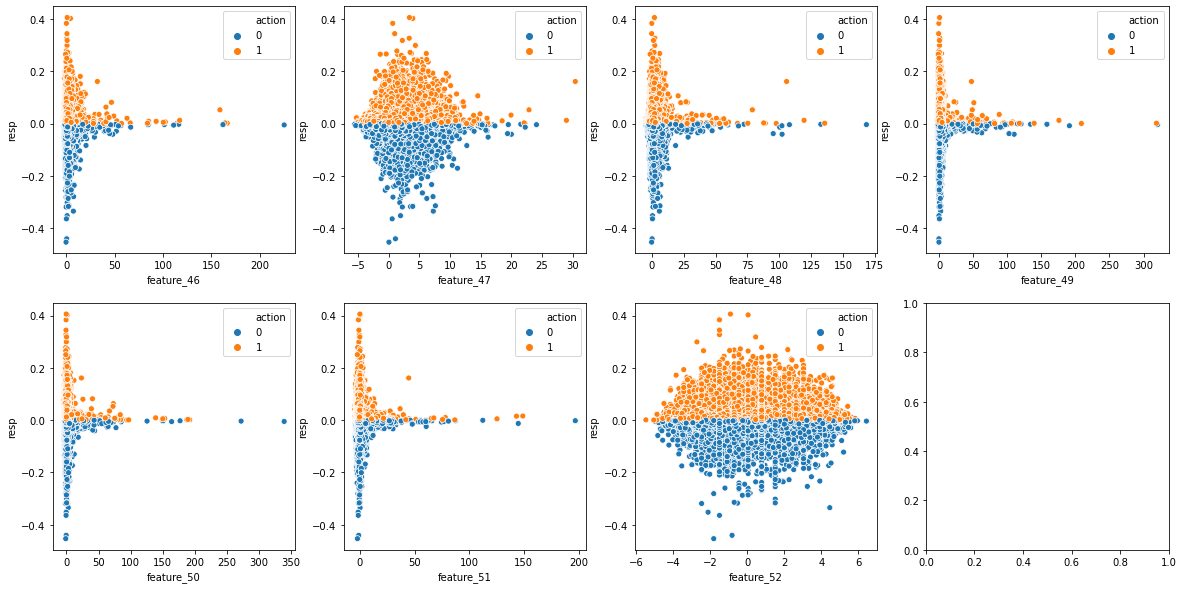

In [68]:
fig, ax = plt.subplots(2,4,figsize=(20,10))
sns.scatterplot(x="feature_46", y="resp", hue="action", data=train_sample, ax=ax[0, 0])
sns.scatterplot(x="feature_47", y="resp", hue="action", data=train_sample, ax=ax[0, 1])
sns.scatterplot(x="feature_48", y="resp", hue="action", data=train_sample, ax=ax[0, 2])
sns.scatterplot(x="feature_49", y="resp", hue="action", data=train_sample, ax=ax[0, 3])
sns.scatterplot(x="feature_50", y="resp", hue="action", data=train_sample, ax=ax[1, 0])
sns.scatterplot(x="feature_51", y="resp", hue="action", data=train_sample, ax=ax[1, 1])
sns.scatterplot(x="feature_52", y="resp", hue="action", data=train_sample, ax=ax[1, 2])

In [69]:
#Select between features 60 - 61
df_info.loc[["feature_60", "feature_61"]]

type  missing_count  missing_perc  unique      skew      kurt  \
feature_60  float64              0           0.0   78761  1.096514  0.847891   
feature_61  float64              0           0.0   78805  1.206687  1.004331   

                corr  corr_p_value     count      mean       std       min  \
feature_60  0.006059      0.055349  100000.0  0.544774  2.211379 -5.646242   
feature_61  0.006140      0.052171  100000.0  0.547386  1.989880 -4.656658   

                 25%       50%       75%       max  
feature_60 -0.939105 -0.013301  1.463431  9.638540  
feature_61 -0.781359 -0.011301  1.310455  8.594997

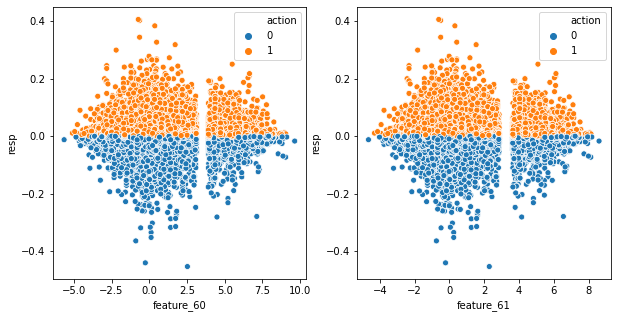

In [70]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

sns.scatterplot(x="feature_60", y="resp", hue="action", data=train_sample, ax=ax[0])
sns.scatterplot(x="feature_61", y="resp", hue="action", data=train_sample, ax=ax[1])

In [71]:
#Select between features 62 - 63
df_info.loc[["feature_62", "feature_63"]]

type  missing_count  missing_perc  unique      skew      kurt  \
feature_62  float64              0           0.0   78078  1.122914  0.942182   
feature_63  float64              0           0.0   78128  1.082125  0.870908   

                corr  corr_p_value     count      mean       std       min  \
feature_62  0.001659      0.599812  100000.0  0.543143  2.183252 -5.223536   
feature_63  0.001835      0.561697  100000.0  0.544805  2.268228 -6.320685   

                 25%       50%       75%        max  
feature_62 -0.926462 -0.011408  1.453450   9.698014  
feature_63 -0.984840 -0.011341  1.515995  10.035729

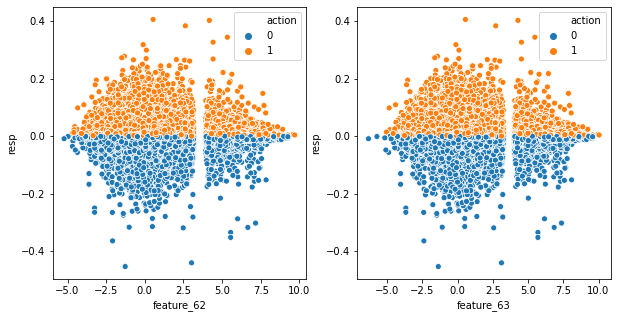

In [72]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

sns.scatterplot(x="feature_62", y="resp", hue="action", data=train_sample, ax=ax[0])
sns.scatterplot(x="feature_63", y="resp", hue="action", data=train_sample, ax=ax[1])

In [73]:
#Select between features 65 - 66
df_info.loc[["feature_65", "feature_66"]]

type  missing_count  missing_perc  unique      skew      kurt  \
feature_65  float64              0           0.0   99978  0.740211 -0.356751   
feature_66  float64              0           0.0   99975  0.876433 -0.327165   

                corr  corr_p_value     count      mean       std       min  \
feature_65 -0.003282      0.299304  100000.0  0.599807  2.186397 -4.711823   
feature_66 -0.003374      0.286011  100000.0  0.602513  1.749852 -2.725545   

                 25%       50%       75%       max  
feature_65 -1.074298 -0.009455  1.946669  8.241575  
feature_66 -0.761545 -0.007442  1.634870  6.169430

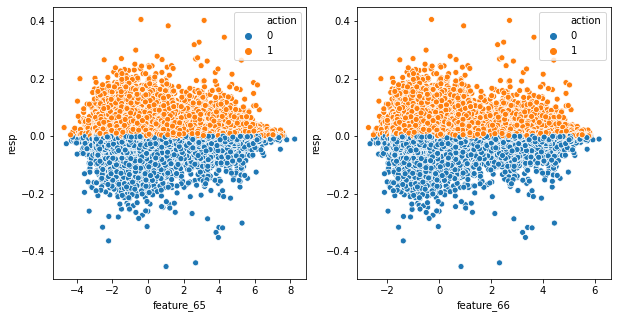

In [74]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

sns.scatterplot(x="feature_65", y="resp", hue="action", data=train_sample, ax=ax[0])
sns.scatterplot(x="feature_66", y="resp", hue="action", data=train_sample, ax=ax[1])

In [75]:
#Select between features 67 - 68
df_info.loc[["feature_67", "feature_68"]]

type  missing_count  missing_perc  unique      skew      kurt  \
feature_67  float64              0           0.0   99986  0.621830 -0.383855   
feature_68  float64              0           0.0   99981  0.636263 -0.380925   

                corr  corr_p_value     count      mean       std       min  \
feature_67  0.000396      0.900263  100000.0  0.570296  2.583629 -6.679294   
feature_68  0.000259      0.934737  100000.0  0.571373  2.521776 -6.398408   

                 25%       50%       75%       max  
feature_67 -1.385664 -0.016801  2.313753  9.982989  
feature_68 -1.340614 -0.015236  2.259323  9.883921

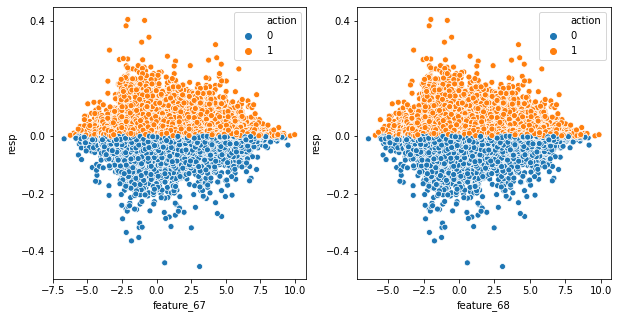

In [76]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

sns.scatterplot(x="feature_67", y="resp", hue="action", data=train_sample, ax=ax[0])
sns.scatterplot(x="feature_68", y="resp", hue="action", data=train_sample, ax=ax[1])

In [77]:
#Select between features 69 - 71
df_info.loc[["feature_69", "feature_70", "feature_71"]]

type  missing_count  missing_perc  unique      skew       kurt  \
feature_69  float64              0           0.0   22905  1.836219   8.845562   
feature_70  float64              0           0.0   91957  2.910944  71.187177   
feature_71  float64              0           0.0   91954  3.545320  62.873135   

                corr  corr_p_value     count      mean       std       min  \
feature_69  0.028778  8.853590e-20  100000.0  0.360523  2.287544 -2.810803   
feature_70  0.013311  2.560695e-05  100000.0  0.242399  2.470615 -3.467993   
feature_71  0.021709  6.618059e-12  100000.0  0.329513  1.849984 -2.050142   

                 25%       50%       75%         max  
feature_69 -1.146652 -0.008337  1.439709   33.109281  
feature_70 -1.296453 -0.003209  1.276000  121.438625  
feature_71 -0.835233 -0.007488  1.090876   78.509807

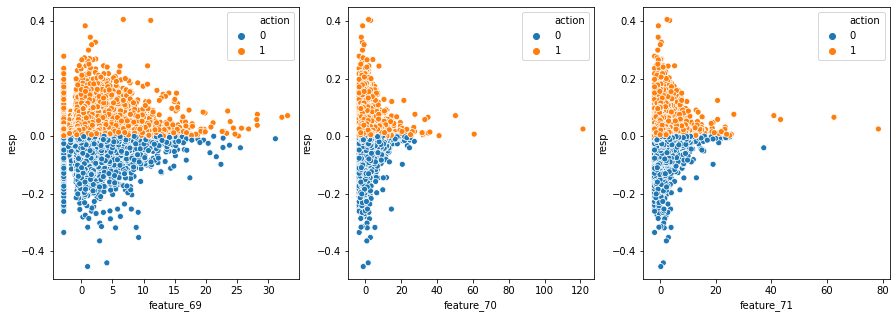

In [78]:
fig, ax = plt.subplots(1,3, figsize=(15,5))

sns.scatterplot(x="feature_69", y="resp", hue="action", data=train_sample, ax=ax[0])
sns.scatterplot(x="feature_70", y="resp", hue="action", data=train_sample, ax=ax[1])
sns.scatterplot(x="feature_71", y="resp", hue="action", data=train_sample, ax=ax[2])

Comparing some of the chart pairs shows almost the same data, which is also indicated by features 100% correlation. I will use the first item from those pairs.
Group 2 selected features: [43, 44, 52, 54, 59, 60, 62, 64, 65, 67, 69]

Next we have group 3

In [79]:
selected_group_2 = [43, 44, 52, 54, 59, 60, 62, 64, 65, 67, 70]

In [80]:
#Select between features 77 - 83
df_info.loc[["feature_77", "feature_83"]]

type  missing_count  missing_perc  unique      skew       kurt  \
feature_77  float64              0           0.0   98413 -2.606976  45.131397   
feature_83  float64              0           0.0   99682 -0.622412   8.454198   

                corr  corr_p_value     count      mean       std        min  \
feature_77 -0.003091      0.328363  100000.0 -0.079020  2.682912 -55.860820   
feature_83 -0.002614      0.408373  100000.0 -0.074996  2.463194 -43.387515   

                 25%       50%       75%        max  
feature_77 -1.220178  0.009935  1.169480  42.143288  
feature_83 -1.235203  0.007708  1.179884  24.471630

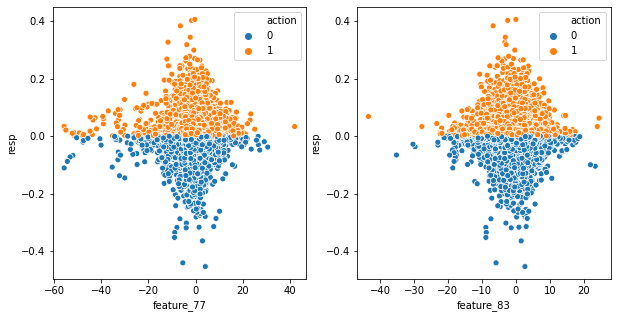

In [81]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

sns.scatterplot(x="feature_77", y="resp", hue="action", data=train_sample, ax=ax[0])
sns.scatterplot(x="feature_83", y="resp", hue="action", data=train_sample, ax=ax[1])

In [82]:
#Select between features 89, 95, 101, 107, 113, 119
df_info.loc[["feature_89", "feature_95", "feature_101", "feature_107", "feature_113", "feature_119"]]

type  missing_count  missing_perc  unique      skew  \
feature_89   float64              0           0.0   99103  7.726688   
feature_95   float64              0           0.0   99912  2.207372   
feature_101  float64              0           0.0   99107  9.444381   
feature_107  float64              0           0.0   99915  2.188854   
feature_113  float64              0           0.0   99556  7.123231   
feature_119  float64              0           0.0   99985  2.903153   

                   kurt      corr  corr_p_value     count      mean       std  \
feature_89   126.620706  0.003906      0.216747  100000.0  0.395439  2.645347   
feature_95    12.345051 -0.002240      0.478680  100000.0  0.410722  2.507864   
feature_101  172.341636  0.005042      0.110855  100000.0  0.404957  2.634159   
feature_107   11.937790 -0.001551      0.623861  100000.0  0.407237  2.486261   
feature_113  112.072258  0.004587      0.146911  100000.0  0.396533  2.903858   
feature_119   19.146184 -0.001819      0.565088  100000.0  0.409827  2.062225   

                  min       25%       50%       75%         max  
feature_89  -4.087127 -0.868528 -0.006042  1.004773  115.381744  
feature_95  -5.853938 -1.162118 -0.009333  1.436378   39.254048  
feature_101 -3.501397 -0.750299 -0.004421  0.882361  115.575322  
feature_107 -5.984121 -1.145076 -0.010241  1.410102   35.992815  
feature_113 -5.565372 -1.044468 -0.006354  1.169997  117.901453  
feature_119 -4.305656 -0.830109 -0.008901  1.103449   35.823436

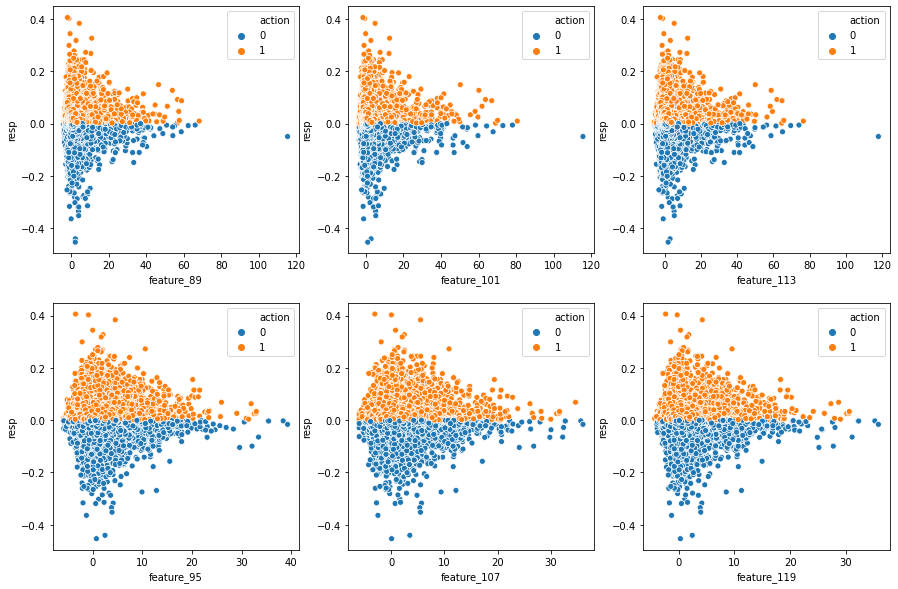

In [83]:
fig, ax = plt.subplots(2,3, figsize=(15,10))

sns.scatterplot(x="feature_89", y="resp", hue="action", data=train_sample, ax=ax[0, 0])
sns.scatterplot(x="feature_101", y="resp", hue="action", data=train_sample, ax=ax[0, 1])
sns.scatterplot(x="feature_113", y="resp", hue="action", data=train_sample, ax=ax[0, 2])

sns.scatterplot(x="feature_95", y="resp", hue="action", data=train_sample, ax=ax[1, 0])
sns.scatterplot(x="feature_107", y="resp", hue="action", data=train_sample, ax=ax[1, 1])
sns.scatterplot(x="feature_119", y="resp", hue="action", data=train_sample, ax=ax[1, 2])

In [84]:
#Select between features 76, 82
df_info.loc[["feature_76", "feature_82"]]

type  missing_count  missing_perc  unique      skew  \
feature_76  float64            281       0.00281   89834 -0.862183   
feature_82  float64            281       0.00281   96256 -8.854512   

                  kurt      corr  corr_p_value    count      mean       std  \
feature_76   26.497448  0.011063      0.000477  99719.0 -0.039940  2.253308   
feature_82  606.594977  0.013875      0.000012  99719.0 -0.044115  1.973203   

                   min       25%       50%       75%        max  
feature_76  -73.571700 -1.046165  0.024147  0.999211  31.102944  
feature_82 -154.932169 -0.828408  0.013995  0.789249  41.822593

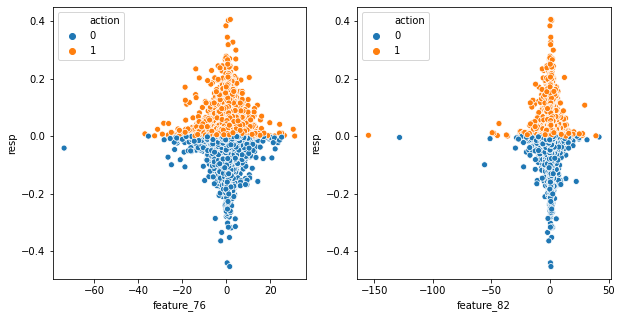

In [85]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

sns.scatterplot(x="feature_76", y="resp", hue="action", data=train_sample, ax=ax[0])
sns.scatterplot(x="feature_82", y="resp", hue="action", data=train_sample, ax=ax[1])

In [86]:
#Select between features 88, 100, 112, 94, 106, 118
df_info.loc[["feature_88", "feature_100", "feature_112", "feature_94", "feature_106", "feature_118"]]

type  missing_count  missing_perc  unique       skew  \
feature_88   float64            281       0.00281   64507   3.832474   
feature_100  float64            281       0.00281   65224   6.703823   
feature_112  float64            281       0.00281   86806   3.431101   
feature_94   float64            281       0.00281   69637   5.865878   
feature_106  float64            281       0.00281   70402  14.741159   
feature_118  float64            281       0.00281   96499   7.832021   

                   kurt      corr  corr_p_value    count      mean       std  \
feature_88    34.684618  0.015484      0.000001  99719.0  0.514851  2.567379   
feature_100  137.919035 -0.002428      0.443169  99719.0  0.511031  2.340834   
feature_112   37.398333  0.014232      0.000007  99719.0  0.418321  2.629232   
feature_94    85.455702  0.013956      0.000010  99719.0  0.421721  2.036636   
feature_106  916.874111 -0.007218      0.022641  99719.0  0.460221  2.832439   
feature_118  303.110533  0.007588      0.016567  99719.0  0.386593  2.393291   

                  min       25%       50%       75%         max  
feature_88  -1.641860 -1.641860  0.007580  1.387677   54.176370  
feature_100 -1.194013 -1.194013 -0.002845  1.100465  123.742130  
feature_112 -3.807339 -1.140163 -0.002778  1.408702   86.579449  
feature_94  -1.086886 -1.086886 -0.001844  0.978362   69.510730  
feature_106 -1.781693 -1.781693 -0.000357  1.415102  247.102376  
feature_118 -3.202494 -0.952958  0.003608  1.177248  156.251243

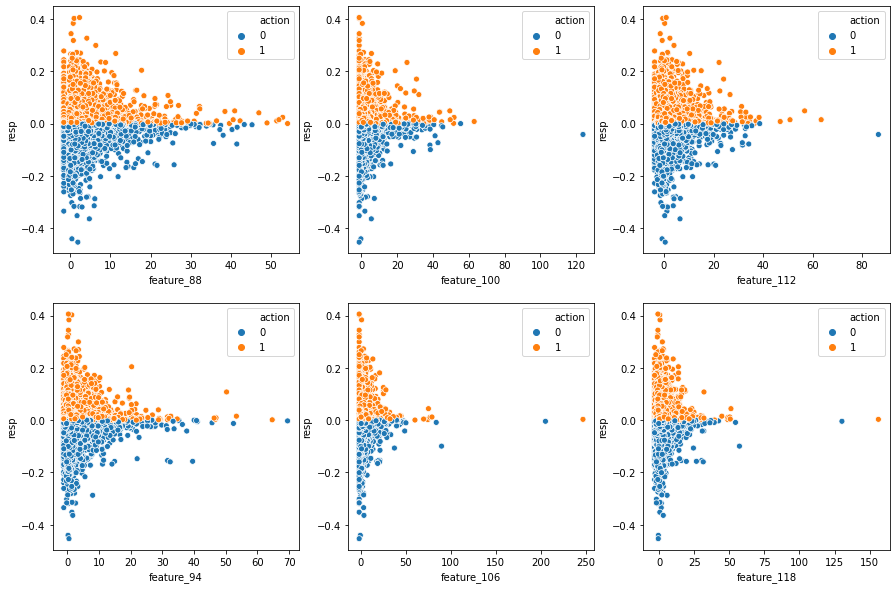

In [87]:
fig, ax = plt.subplots(2,3, figsize=(15,10))

sns.scatterplot(x="feature_88", y="resp", hue="action", data=train_sample, ax=ax[0, 0])
sns.scatterplot(x="feature_100", y="resp", hue="action", data=train_sample, ax=ax[0, 1])
sns.scatterplot(x="feature_112", y="resp", hue="action", data=train_sample, ax=ax[0, 2])

sns.scatterplot(x="feature_94", y="resp", hue="action", data=train_sample, ax=ax[1, 0])
sns.scatterplot(x="feature_106", y="resp", hue="action", data=train_sample, ax=ax[1, 1])
sns.scatterplot(x="feature_118", y="resp", hue="action", data=train_sample, ax=ax[1, 2])

Again we can see some very similar values, here is my selection: [76, 83, 88, 107]. I group 4 we need to select only the correct resp features: [128, 129].

In [88]:
selected_group_3 = [76, 83, 88, 107]
selected_group_4 = [128, 129]

I will group those features in one list and create another list with actual column names.

In [89]:
selected_features = selected_group_1 + selected_group_2 + selected_group_3 + selected_group_4
print(selected_features)

[1, 3, 15, 35, 43, 44, 52, 54, 59, 60, 62, 64, 65, 67, 70, 76, 83, 88, 107, 128, 129]


In [90]:
selected_features_names = ["feature_" + str(index) for index in selected_features]
df_info.loc[selected_features_names]

type  missing_count  missing_perc  unique       skew  \
feature_1    float64              0       0.00000   78631   2.008628   
feature_3    float64             15       0.00015   75008  -0.081490   
feature_15   float64            281       0.00281   85395   0.912189   
feature_35   float64            281       0.00281   90594   0.818391   
feature_43   float64              0       0.00000   14272   0.584952   
feature_44   float64             15       0.00015   65499   5.378166   
feature_52   float64              0       0.00000    7353   0.245531   
feature_54   float64              0       0.00000   99296   4.712906   
feature_59   float64              3       0.00003   99988  36.075867   
feature_60   float64              0       0.00000   78761   1.096514   
feature_62   float64              0       0.00000   78078   1.122914   
feature_64   float64              0       0.00000  100000   0.273154   
feature_65   float64              0       0.00000   99978   0.740211   
feature_67   float64              0       0.00000   99986   0.621830   
feature_70   float64              0       0.00000   91957   2.910944   
feature_76   float64            281       0.00281   89834  -0.862183   
feature_83   float64              0       0.00000   99682  -0.622412   
feature_88   float64            281       0.00281   64507   3.832474   
feature_107  float64              0       0.00000   99915   2.188854   
feature_128  float64             86       0.00086   99850   1.229738   
feature_129  float64             86       0.00086   99705   4.517400   

                    kurt      corr  corr_p_value     count      mean  \
feature_1      13.259812  0.027332  5.390079e-18  100000.0  0.380708   
feature_3       4.139752  0.002416  4.449811e-01   99985.0  0.005676   
feature_15     11.279991  0.022842  5.430862e-13   99719.0  0.209574   
feature_35      6.032596  0.032038  4.520837e-24   99719.0  0.339926   
feature_43      0.051713  0.017806  1.789799e-08  100000.0  0.340063   
feature_44     69.438828  0.002573  4.158596e-01   99985.0  0.417936   
feature_52     -0.570166 -0.018965  2.002229e-09  100000.0  0.045373   
feature_54    104.644271  0.006914  2.879041e-02  100000.0  0.365742   
feature_59   2068.205467  0.003965  2.099031e-01   99997.0  0.754082   
feature_60      0.847891  0.006059  5.534862e-02  100000.0  0.544774   
feature_62      0.942182  0.001659  5.998121e-01  100000.0  0.543143   
feature_64     -1.037494  0.003074  3.309385e-01  100000.0  0.417303   
feature_65     -0.356751 -0.003282  2.993037e-01  100000.0  0.599807   
feature_67     -0.383855  0.000396  9.002634e-01  100000.0  0.570296   
feature_70     71.187177  0.013311  2.560695e-05  100000.0  0.242399   
feature_76     26.497448  0.011063  4.767669e-04   99719.0 -0.039940   
feature_83      8.454198 -0.002614  4.083729e-01  100000.0 -0.074996   
feature_88     34.684618  0.015484  1.009510e-06   99719.0  0.514851   
feature_107    11.937790 -0.001551  6.238606e-01  100000.0  0.407237   
feature_128     4.570023  0.021211  2.008892e-11   99914.0  0.341178   
feature_129   185.281165  0.006226  4.906732e-02   99914.0  0.255804   

                  std        min       25%       50%       75%         max  
feature_1    2.564814  -3.172026 -1.305471 -0.001308  1.574759   55.701692  
feature_3    1.940606 -23.353321 -1.027896 -0.001273  1.036604   20.491296  
feature_15   1.882917 -33.432773 -0.895278 -0.003003  1.109734   31.613230  
feature_35   2.411191 -35.138773 -1.165185 -0.012475  1.636722   32.877007  
feature_43   2.327900  -6.053608 -1.378898 -0.005442  1.800536    9.841300  
feature_44   2.866294  -6.956901 -1.100376 -0.002981  1.258417   60.058246  
feature_52   1.875741  -5.489147 -1.509645  0.039408  1.427235    6.435942  
feature_54   1.932756  -4.435982 -0.787052  0.002927  1.284577   87.534594  
feature_59   8.658139  -5.476708 -0.969101  0.005089  1.116631  756.534442  
feature_60   2.211379  -5.646242 -0.939105 -0.013301  1.463431    9.638540  

In [91]:
print(selected_features_names)

['feature_1', 'feature_3', 'feature_15', 'feature_35', 'feature_43', 'feature_44', 'feature_52', 'feature_54', 'feature_59', 'feature_60', 'feature_62', 'feature_64', 'feature_65', 'feature_67', 'feature_70', 'feature_76', 'feature_83', 'feature_88', 'feature_107', 'feature_128', 'feature_129']


In [92]:
# All features groups
# g1_feat = [1, [3, 5]] #add 1 to get even values
# g2_feat = [[41, 42, 43, 53], [44, 45], [46, 47, 48, 49, 50, 51, 52], 54, [60, 61], [62, 63], 64, [65, 66], [67, 68], [69, 70, 71]]
# g3_feat = [[77, 83], [89, 95, 101], [107, 113, 119]] #last 2 elements can be grouped

# g1_feat_1 = [7, [17, 27]] #add 2 to get other resp values, add 1 to get even values
# g2_feat_1 = [55] #add 1 to get other resp values
# g3_feat_1 = [[72, 78], [84, 96, 108], [90, 102, 114]] #add 1 to get other resp values, last 2 elements can be grouped
# g4_feat_1 = [120, 121] #add 2 to get other resp values

<a id="section-2.3"></a>
## 2.3 Date features ##

In [93]:
datetime_info = df_info.loc[datetime_features]
datetime_info

type  missing_count  missing_perc  unique      skew      kurt  \
date  int32              0           0.0     500 -0.033221 -1.289146   

          corr  corr_p_value     count       mean         std  min    25%  \
date -0.014622      0.000004  100000.0  247.91247  151.816206  0.0  106.0   

        50%    75%    max  
date  254.0  381.0  499.0

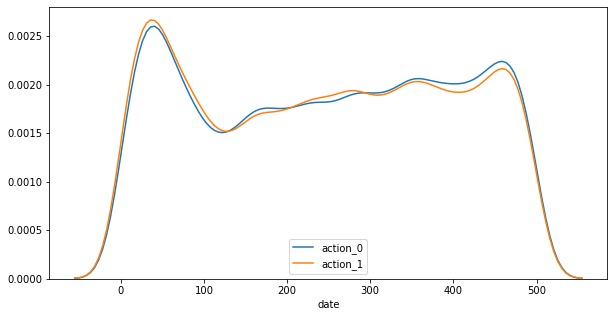

In [94]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.distplot(train_sample[train_sample["action"] == 0]["date"], hist=False, label="action_0")
sns.distplot(train_sample[train_sample["action"] == 1]["date"], hist=False, label="action_1")
plt.legend(loc="lower center")

In [95]:
group = train_sample.groupby("date").agg({"weight": [np.median]}).reset_index()
group.columns = group.columns.get_level_values(0)

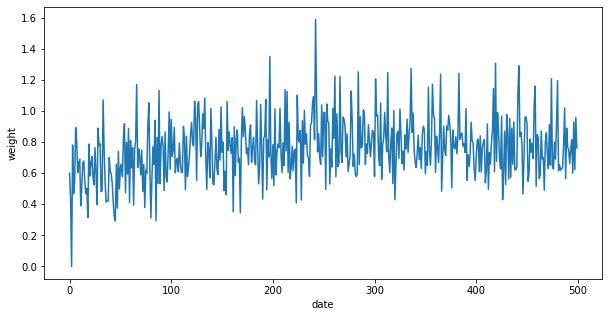

In [96]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.lineplot(x="date", y="weight", data=group)

We can see 2 peaks in date distribution data. The first peak has more trading opportunities where we should take action, the second peak is the other way around.
Weight values seems to be raising over time, therefore we can gain more in the second peak but it is riskier.

<a id="section-2.4"></a>
## 2.4 Features transformation ##

After the feature analysis we should take care of skewness and kurtosis for each of them. Skewness should be between -0,5 and 0,5 for each feature to become normal like distribution. To take care of kurtosis I will remove outliers with z-score above 5 and below -5. I am trying to get the value between +2 and -2.

Finally I will downgrade the features for faster calculations.

In [97]:
selected_features_names = ['feature_0', 'feature_1', 'feature_5', 'feature_15', 'feature_35', 'feature_41', 'feature_43', 'feature_44', 'feature_45', 'feature_52', 'feature_59', 'feature_60', 'feature_62', 'feature_64', 'feature_65', 'feature_67', 'feature_70', 'feature_76', 'feature_83', 'feature_107', 'feature_128']

In [98]:
#Select above threshold anonymus features
features_to_remove_outliers = []
features_to_scale = []

#anonymized_features
for feat in selected_features_names:
    if df_info.loc[feat, "kurt"] > 2:
        features_to_remove_outliers.append(feat)

    if abs(df_info.loc[feat, "skew"]) > 0.5:
        features_to_scale.append(feat)

In [99]:
from scipy import stats

def transform(df_temp):
    
    df = df_temp.copy()
        
    # Remove weight = 0
    with timer():
        df = df[df["weight"] != 0]
        
    # Calculate z-scores values and remove outliers
    with timer():
        for feat in features_to_remove_outliers:
            feat_zscore = feat + '_zscore'
            df[feat_zscore] = (df[feat] - df[feat].mean())/df[feat].std()
        
        df["max_feat_zscore"] = df[df.columns[-len(features_to_remove_outliers):]].abs().max(axis=1)
        df = df[df["max_feat_zscore"] < 6]

    # Use arcsinh on features with high skewness
    with timer():
        for feat in features_to_scale:
            df[feat] = np.arcsinh(df[feat])
        

    #Fill missing values
    with timer():
        for feat in selected_features_names:
            df[feat].fillna(method='ffill', inplace=True)

    #Normalization
    with timer():
        df[selected_features_names]=(df[selected_features_names] - df[selected_features_names].mean()) / df[selected_features_names].std()
    
    return df

In [100]:
%%time
train_transformed = transform(train)[selected_features_names]

Runtime: 2.22s 

Runtime: 6.68s 

Runtime: 1.54s 

Runtime: 0.09s 

Runtime: 0.79s 

CPU times: user 7 s, sys: 9.31 s, total: 16.3 s
Wall time: 15.8 s
